In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
veriler=pd.read_csv('weather.txt')

In [3]:
veriler=veriler.drop(['PeriodEnd','Period'],axis=1)

In [4]:
for i in range(len(veriler)):
    veriler.date[i]=veriler.date[i].replace('T',' ').replace('Z','')

C:\Users\zetze\AppData\Local\Temp/ipykernel_6992/2599409677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veriler.date[i]=veriler.date[i].replace('T',' ').replace('Z','')


In [5]:
veriler['date']=pd.to_datetime(veriler['date'])

In [6]:
from datetime import datetime, timedelta
for i in range(len(veriler)):
    veriler['date'][i]=veriler['date'][i] + timedelta(hours=3)

C:\Users\zetze\AppData\Local\Temp/ipykernel_6992/3721726775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veriler['date'][i]=veriler['date'][i] + timedelta(hours=3)


In [7]:
santral_veri=pd.read_csv('santral.txt',sep='\t')

In [8]:
santral_veri

,Tarih,Üretim (kWh)
0,1.05.2018 04:55,0
1,1.05.2018 05:00,0
2,1.05.2018 05:15,0
3,1.05.2018 05:30,0
4,1.05.2018 05:45,0
...,...,...
20215,31.05.2019 21:45,0
20216,31.05.2019 22:00,0
20217,31.05.2019 22:15,0
20218,31.05.2019 22:30,0


In [9]:
for i in range(len(santral_veri)):
    santral_veri.Tarih[i]=santral_veri.Tarih[i].replace('.','-')

In [10]:
santral_veri.Tarih[0]='1-05-2018 04:45'

In [11]:
for i in range(len(santral_veri)):
    if santral_veri.Tarih[i][1]=='-':
        santral_veri.Tarih[i]=f'0{santral_veri.Tarih[i]}:00'
    else:
        santral_veri.Tarih[i]=f'{santral_veri.Tarih[i]}:00'

In [12]:
for i in range(len(santral_veri)):
    santral_veri.Tarih[i]=f'{santral_veri.Tarih[i][6:10]}-{santral_veri.Tarih[i][3:5]}-{santral_veri.Tarih[i][0:2]} {santral_veri.Tarih[i][11:]}'
    santral_veri.Tarih[i]=santral_veri.Tarih[i].strip()

In [13]:
for i in range (len(santral_veri)):
    try:
        santral_veri['Tarih'][i]=pd.to_datetime(santral_veri['Tarih'][i])
    except:
        print(santral_veri['Tarih'][i])
        print(i)

1900-01-00 00:00:00
19338


In [14]:
santral_veri['Tarih'][19338]='2019-05-18 23:00:00'

In [15]:
santral_veri['Tarih']=pd.to_datetime(santral_veri['Tarih'])

In [16]:
all_date=pd.date_range(start='2018-05-01 04:45:00',end='2019-05-31 22:45:00',freq='15min')

In [17]:
tarihler=[]
for i in range(len(santral_veri)):
    tarihler.append(santral_veri.Tarih[i])

In [18]:
data=[]
for i in range (len(santral_veri)):
    data.append(f'{santral_veri["Tarih"][i]}  {santral_veri["Üretim (kWh)"][i]}')

In [19]:
all_date_list=[]
for i in range(len(all_date)):
    if (all_date[i].month==7 and all_date[i].year==2018) or (all_date[i].month==10 and all_date[i].year==2018) or (all_date[i].month==1 and all_date[i].year==2019):
        continue
    all_date_list.append(all_date[i])
    

In [20]:
for i in range(len(all_date_list)):
    all_date_list[i]=str(all_date_list[i])
    for j in range(len(santral_veri)-1,-1,-1):
        if all_date_list[i]==data[j][0:19]:
            all_date_list[i]=data[j]
            print(all_date_list[i])
            break

2018-05-01 04:45:00  0
2018-05-01 05:00:00  0
2018-05-01 05:15:00  0
2018-05-01 05:30:00  0
2018-05-01 05:45:00  0
2018-05-01 06:00:00  0
2018-05-01 06:15:00  0
2018-05-01 06:30:00  0
2018-05-01 06:45:00  0
2018-05-01 07:00:00  0
2018-05-01 07:15:00  0
2018-05-01 07:30:00  10
2018-05-01 07:45:00  20
2018-05-01 08:00:00  0
2018-05-01 08:15:00  0
2018-05-01 08:30:00  20
2018-05-01 08:45:00  20
2018-05-01 09:00:00  30
2018-05-01 09:15:00  70
2018-05-01 09:30:00  40
2018-05-01 09:45:00  70
2018-05-01 10:00:00  80
2018-05-01 10:15:00  80
2018-05-01 10:30:00  100
2018-05-01 10:45:00  130
2018-05-01 11:00:00  110
2018-05-01 11:15:00  160
2018-05-01 11:30:00  190
2018-05-01 11:45:00  200
2018-05-01 12:00:00  230
2018-05-01 12:15:00  220
2018-05-01 12:30:00  230
2018-05-01 12:45:00  230
2018-05-01 13:00:00  230
2018-05-01 13:15:00  270
2018-05-01 13:30:00  200
2018-05-01 13:45:00  270
2018-05-01 14:00:00  220
2018-05-01 14:15:00  250
2018-05-01 14:30:00  240
2018-05-01 14:45:00  190
2018-05-01 

2018-05-06 14:45:00  90
2018-05-06 15:00:00  100
2018-05-06 15:15:00  60
2018-05-06 15:30:00  100
2018-05-06 15:45:00  70
2018-05-06 16:00:00  70
2018-05-06 16:15:00  60
2018-05-06 16:30:00  50
2018-05-06 16:45:00  10
2018-05-06 17:00:00  30
2018-05-06 17:15:00  0
2018-05-06 17:30:00  40
2018-05-06 17:45:00  50
2018-05-06 18:00:00  40
2018-05-06 18:15:00  40
2018-05-06 18:30:00  30
2018-05-06 18:45:00  10
2018-05-06 19:00:00  0
2018-05-06 19:15:00  0
2018-05-06 19:30:00  0
2018-05-06 19:45:00  0
2018-05-06 20:00:00  0
2018-05-06 20:15:00  0
2018-05-06 20:30:00  0
2018-05-06 20:45:00  0
2018-05-06 21:00:00  0
2018-05-06 21:15:00  0
2018-05-06 21:30:00  0
2018-05-06 21:45:00  0
2018-05-07 05:00:00  0
2018-05-07 05:15:00  0
2018-05-07 05:30:00  0
2018-05-07 05:45:00  0
2018-05-07 06:00:00  0
2018-05-07 06:15:00  0
2018-05-07 06:30:00  0
2018-05-07 06:45:00  0
2018-05-07 07:00:00  10
2018-05-07 07:15:00  0
2018-05-07 07:45:00  20
2018-05-07 08:00:00  0
2018-05-07 08:15:00  0
2018-05-07 08:

2018-05-12 06:00:00  0
2018-05-12 06:15:00  0
2018-05-12 06:30:00  0
2018-05-12 06:45:00  10
2018-05-12 07:00:00  0
2018-05-12 07:15:00  10
2018-05-12 07:30:00  20
2018-05-12 07:45:00  10
2018-05-12 08:00:00  30
2018-05-12 08:15:00  40
2018-05-12 08:30:00  30
2018-05-12 08:45:00  50
2018-05-12 09:00:00  110
2018-05-12 09:15:00  50
2018-05-12 09:30:00  120
2018-05-12 09:45:00  150
2018-05-12 10:00:00  140
2018-05-12 10:15:00  160
2018-05-12 10:30:00  190
2018-05-12 10:45:00  210
2018-05-12 11:00:00  120
2018-05-12 11:15:00  130
2018-05-12 11:30:00  190
2018-05-12 11:45:00  210
2018-05-12 12:00:00  200
2018-05-12 12:15:00  230
2018-05-12 12:30:00  200
2018-05-12 12:45:00  240
2018-05-12 13:00:00  210
2018-05-12 13:15:00  260
2018-05-12 13:30:00  230
2018-05-12 13:45:00  260
2018-05-12 14:00:00  230
2018-05-12 14:15:00  220
2018-05-12 14:30:00  260
2018-05-12 14:45:00  220
2018-05-12 15:00:00  160
2018-05-12 15:15:00  230
2018-05-12 15:30:00  170
2018-05-12 15:45:00  210
2018-05-12 16:00:

2018-05-20 06:00:00  0
2018-05-20 06:15:00  0
2018-05-20 06:30:00  10
2018-05-20 06:45:00  0
2018-05-20 07:00:00  0
2018-05-20 07:15:00  10
2018-05-20 07:30:00  0
2018-05-20 07:45:00  20
2018-05-20 08:00:00  0
2018-05-20 08:15:00  10
2018-05-20 08:30:00  0
2018-05-20 08:45:00  10
2018-05-20 09:00:00  10
2018-05-20 09:15:00  10
2018-05-20 09:30:00  10
2018-05-20 09:45:00  30
2018-05-20 10:00:00  60
2018-05-20 10:15:00  80
2018-05-20 10:30:00  160
2018-05-20 10:45:00  110
2018-05-20 11:00:00  110
2018-05-20 11:15:00  80
2018-05-20 11:30:00  80
2018-05-20 11:45:00  100
2018-05-20 12:00:00  60
2018-05-20 12:15:00  60
2018-05-20 12:30:00  110
2018-05-20 12:45:00  110
2018-05-20 13:00:00  270
2018-05-20 13:15:00  230
2018-05-20 13:30:00  240
2018-05-20 13:45:00  210
2018-05-20 14:00:00  200
2018-05-20 14:15:00  180
2018-05-20 14:30:00  180
2018-05-20 14:45:00  250
2018-05-20 15:00:00  230
2018-05-20 15:15:00  180
2018-05-20 15:30:00  170
2018-05-20 15:45:00  120
2018-05-20 16:00:00  150
2018

2018-05-26 06:00:00  3
2018-05-26 06:15:00  1
2018-05-26 06:30:00  5
2018-05-26 06:45:00  9
2018-05-26 07:00:00  11
2018-05-26 07:15:00  18
2018-05-26 07:30:00  28
2018-05-26 07:45:00  51
2018-05-26 08:00:00  48
2018-05-26 08:15:00  52
2018-05-26 08:30:00  83
2018-05-26 08:45:00  88
2018-05-26 09:00:00  96
2018-05-26 09:15:00  111
2018-05-26 09:30:00  121
2018-05-26 09:45:00  144
2018-05-26 10:00:00  155
2018-05-26 10:15:00  151
2018-05-26 10:30:00  133
2018-05-26 10:45:00  96
2018-05-26 11:00:00  98
2018-05-26 11:15:00  101
2018-05-26 11:30:00  128
2018-05-26 11:45:00  189
2018-05-26 12:00:00  217
2018-05-26 12:15:00  211
2018-05-26 12:30:00  219
2018-05-26 12:45:00  153
2018-05-26 13:00:00  214
2018-05-26 13:15:00  224
2018-05-26 13:30:00  232
2018-05-26 13:45:00  229
2018-05-26 14:00:00  236
2018-05-26 14:15:00  228
2018-05-26 14:30:00  197
2018-05-26 14:45:00  194
2018-05-26 15:00:00  117
2018-05-26 15:15:00  156
2018-05-26 15:30:00  152
2018-05-26 15:45:00  182
2018-05-26 16:00:00

2018-06-02 06:00:00  1
2018-06-02 06:15:00  1
2018-06-02 06:30:00  10
2018-06-02 06:45:00  11
2018-06-02 07:00:00  17
2018-06-02 07:15:00  19
2018-06-02 07:30:00  32
2018-06-02 07:45:00  26
2018-06-02 08:00:00  30,01
2018-06-02 08:15:00  55
2018-06-02 08:30:00  70
2018-06-02 08:45:00  69
2018-06-02 09:00:00  54
2018-06-02 09:15:00  99,99
2018-06-02 09:30:00  116
2018-06-02 09:45:00  124
2018-06-02 10:00:00  98
2018-06-02 10:15:00  176
2018-06-02 10:30:00  145
2018-06-02 10:45:00  144
2018-06-02 11:00:00  176
2018-06-02 11:15:00  184
2018-06-02 11:30:00  210
2018-06-02 11:45:00  146,01
2018-06-02 12:00:00  226
2018-06-02 12:15:00  193
2018-06-02 12:30:00  240
2018-06-02 12:45:00  188
2018-06-02 13:00:00  243
2018-06-02 13:15:00  237
2018-06-02 13:30:00  237
2018-06-02 13:45:00  234
2018-06-02 14:00:00  238
2018-06-02 14:15:00  241
2018-06-02 14:30:00  237
2018-06-02 14:45:00  237
2018-06-02 15:00:00  226
2018-06-02 15:15:00  181
2018-06-02 15:30:00  188
2018-06-02 15:45:00  210
2018-06-

2018-06-08 06:00:00  0
2018-06-08 06:15:00  1
2018-06-08 06:30:00  5
2018-06-08 06:45:00  4
2018-06-08 07:00:00  9
2018-06-08 07:15:00  11
2018-06-08 07:30:00  17
2018-06-08 07:45:00  22,99
2018-06-08 08:00:00  42
2018-06-08 08:15:00  57
2018-06-08 08:30:00  62
2018-06-08 08:45:00  75
2018-06-08 09:00:00  85
2018-06-08 09:15:00  101
2018-06-08 09:30:00  106,99
2018-06-08 09:45:00  124
2018-06-08 10:00:00  136,01
2018-06-08 10:15:00  155
2018-06-08 10:30:00  155
2018-06-08 10:45:00  169
2018-06-08 11:00:00  177
2018-06-08 11:15:00  165
2018-06-08 11:30:00  201
2018-06-08 11:45:00  179
2018-06-08 12:00:00  205
2018-06-08 12:15:00  212
2018-06-08 12:30:00  214
2018-06-08 12:45:00  219
2018-06-08 13:00:00  215
2018-06-08 13:15:00  219
2018-06-08 13:30:00  218
2018-06-08 13:45:00  209
2018-06-08 14:00:00  226
2018-06-08 14:15:00  215
2018-06-08 14:30:00  214
2018-06-08 14:45:00  209
2018-06-08 15:00:00  208,01
2018-06-08 15:15:00  200
2018-06-08 15:30:00  192
2018-06-08 15:45:00  188
2018-0

2018-06-15 06:00:00  3
2018-06-15 06:15:00  0
2018-06-15 06:30:00  2
2018-06-15 06:45:00  4
2018-06-15 07:00:00  7
2018-06-15 07:15:00  12
2018-06-15 07:30:00  15
2018-06-15 07:45:00  26
2018-06-15 08:00:00  37
2018-06-15 08:15:00  48
2018-06-15 08:30:00  60
2018-06-15 08:45:00  75
2018-06-15 09:00:00  82
2018-06-15 09:15:00  98
2018-06-15 09:30:00  109
2018-06-15 09:45:00  119
2018-06-15 10:00:00  131
2018-06-15 10:15:00  143
2018-06-15 10:30:00  150
2018-06-15 10:45:00  157
2018-06-15 11:00:00  166
2018-06-15 11:15:00  173
2018-06-15 11:30:00  181
2018-06-15 11:45:00  176
2018-06-15 12:00:00  179,1
2018-06-15 12:15:00  217,99
2018-06-15 12:30:00  201
2018-06-15 12:45:00  208
2018-06-15 13:00:00  210
2018-06-15 13:15:00  212
2018-06-15 13:30:00  208,99
2018-06-15 13:45:00  214
2018-06-15 14:00:00  208
2018-06-15 14:15:00  207,01
2018-06-15 14:30:00  208,99
2018-06-15 14:45:00  200
2018-06-15 15:00:00  147
2018-06-15 15:15:00  196,01
2018-06-15 15:30:00  191
2018-06-15 15:45:00  181
20

2018-06-20 12:15:00  187,01
2018-06-20 12:30:00  139,99
2018-06-20 12:45:00  191
2018-06-20 13:00:00  221
2018-06-20 13:15:00  153
2018-06-20 13:30:00  175
2018-06-20 13:45:00  166
2018-06-20 14:00:00  233
2018-06-20 14:15:00  230
2018-06-20 14:30:00  207
2018-06-20 14:45:00  202
2018-06-20 15:00:00  213
2018-06-20 15:15:00  203
2018-06-20 15:30:00  172
2018-06-20 15:45:00  164
2018-06-20 16:00:00  192
2018-06-20 16:15:00  158
2018-06-20 16:30:00  120
2018-06-20 16:45:00  129
2018-06-20 17:00:00  121
2018-06-20 17:15:00  124
2018-06-20 17:30:00  112,01
2018-06-20 17:45:00  104,99
2018-06-20 18:00:00  94
2018-06-20 18:15:00  80
2018-06-20 18:30:00  69
2018-06-20 18:45:00  55
2018-06-20 19:00:00  44
2018-06-20 19:15:00  28
2018-06-20 19:30:00  20
2018-06-20 19:45:00  12
2018-06-20 20:00:00  6
2018-06-20 20:15:00  1
2018-06-20 20:30:00  0
2018-06-20 20:45:00  0
2018-06-20 21:00:00  0
2018-06-20 21:15:00  0
2018-06-20 21:30:00  0
2018-06-20 21:45:00  0
2018-06-20 22:00:00  0
2018-06-20 22:

2018-06-26 06:00:00  4
2018-06-26 06:15:00  2
2018-06-26 06:30:00  6
2018-06-26 06:45:00  15,01
2018-06-26 07:00:00  23
2018-06-26 07:15:00  25,99
2018-06-26 07:30:00  21
2018-06-26 07:45:00  18,01
2018-06-26 08:00:00  45
2018-06-26 08:15:00  41,99
2018-06-26 08:30:00  48
2018-06-26 08:45:00  62
2018-06-26 09:00:00  62
2018-06-26 09:15:00  93
2018-06-26 09:30:00  82
2018-06-26 09:45:00  97
2018-06-26 10:00:00  121
2018-06-26 10:15:00  124
2018-06-26 10:30:00  139
2018-06-26 10:45:00  159
2018-06-26 11:00:00  180
2018-06-26 11:15:00  180,01
2018-06-26 11:30:00  153
2018-06-26 11:45:00  186
2018-06-26 12:00:00  157
2018-06-26 12:15:00  124
2018-06-26 12:30:00  220
2018-06-26 12:45:00  187
2018-06-26 13:00:00  180
2018-06-26 13:15:00  178
2018-06-26 13:30:00  203
2018-06-26 13:45:00  147
2018-06-26 14:00:00  142
2018-06-26 14:15:00  172
2018-06-26 14:30:00  182
2018-06-26 14:45:00  183
2018-06-26 15:00:00  125
2018-06-26 15:15:00  178
2018-06-26 15:30:00  123
2018-06-26 15:45:00  178
2018

2018-08-02 06:00:00  3
2018-08-02 06:15:00  0
2018-08-02 06:30:00  0
2018-08-02 06:45:00  2
2018-08-02 07:00:00  4
2018-08-02 07:15:00  5
2018-08-02 07:30:00  12
2018-08-02 07:45:00  21
2018-08-02 08:00:00  38
2018-08-02 08:15:00  43
2018-08-02 08:30:00  46
2018-08-02 08:45:00  39
2018-08-02 09:00:00  43
2018-08-02 09:15:00  76
2018-08-02 09:30:00  68
2018-08-02 09:45:00  63
2018-08-02 10:00:00  76
2018-08-02 10:15:00  81
2018-08-02 10:30:00  107
2018-08-02 10:45:00  77
2018-08-02 11:00:00  85
2018-08-02 11:15:00  128
2018-08-02 11:30:00  92
2018-08-02 11:45:00  139
2018-08-02 12:00:00  117
2018-08-02 12:15:00  136
2018-08-02 12:30:00  169
2018-08-02 12:45:00  162
2018-08-02 13:00:00  165
2018-08-02 13:15:00  149
2018-08-02 13:30:00  144
2018-08-02 13:45:00  153
2018-08-02 14:00:00  156
2018-08-02 14:15:00  146
2018-08-02 14:30:00  122
2018-08-02 14:45:00  125
2018-08-02 15:00:00  145
2018-08-02 15:15:00  104
2018-08-02 15:30:00  143
2018-08-02 15:45:00  145
2018-08-02 16:00:00  122
20

2018-08-09 06:00:00  3
2018-08-09 06:15:00  0
2018-08-09 06:30:00  0
2018-08-09 06:45:00  0
2018-08-09 07:00:00  3
2018-08-09 07:15:00  2
2018-08-09 07:30:00  4
2018-08-09 07:45:00  10
2018-08-09 08:00:00  21
2018-08-09 08:15:00  37
2018-08-09 08:30:00  33
2018-08-09 08:45:00  51
2018-08-09 09:00:00  62
2018-08-09 09:15:00  70
2018-08-09 09:30:00  81
2018-08-09 09:45:00  91
2018-08-09 10:00:00  101
2018-08-09 10:15:00  108
2018-08-09 10:30:00  115
2018-08-09 10:45:00  131
2018-08-09 11:00:00  131
2018-08-09 11:15:00  141
2018-08-09 11:30:00  144
2018-08-09 11:45:00  150
2018-08-09 12:00:00  147
2018-08-09 12:15:00  164
2018-08-09 12:30:00  166
2018-08-09 12:45:00  164
2018-08-09 13:00:00  172
2018-08-09 13:15:00  172
2018-08-09 13:30:00  178
2018-08-09 13:45:00  152
2018-08-09 14:00:00  167
2018-08-09 14:15:00  172
2018-08-09 14:30:00  161
2018-08-09 14:45:00  174
2018-08-09 15:00:00  127
2018-08-09 15:15:00  163
2018-08-09 15:30:00  150
2018-08-09 15:45:00  118
2018-08-09 16:00:00  14

2018-08-15 06:00:00  1
2018-08-15 06:15:00  0
2018-08-15 06:30:00  0
2018-08-15 06:45:00  0
2018-08-15 07:00:00  2
2018-08-15 07:15:00  4
2018-08-15 07:30:00  3
2018-08-15 07:45:00  13
2018-08-15 08:00:00  16
2018-08-15 08:15:00  29
2018-08-15 08:30:00  37
2018-08-15 08:45:00  48
2018-08-15 09:00:00  60
2018-08-15 09:15:00  74
2018-08-15 09:30:00  85
2018-08-15 09:45:00  82
2018-08-15 10:00:00  99
2018-08-15 10:15:00  111
2018-08-15 10:30:00  122
2018-08-15 10:45:00  127
2018-08-15 11:00:00  137
2018-08-15 11:15:00  143
2018-08-15 11:30:00  148
2018-08-15 11:45:00  140
2018-08-15 12:00:00  136
2018-08-15 12:15:00  152
2018-08-15 12:30:00  151
2018-08-15 12:45:00  127
2018-08-15 13:00:00  176
2018-08-15 13:15:00  182
2018-08-15 13:30:00  116
2018-08-15 13:45:00  180
2018-08-15 14:00:00  140
2018-08-15 14:15:00  161
2018-08-15 14:30:00  172
2018-08-15 14:45:00  163
2018-08-15 15:00:00  159
2018-08-15 15:15:00  147
2018-08-15 15:30:00  171
2018-08-15 15:45:00  146
2018-08-15 16:00:00  144

2018-08-21 06:00:00  1
2018-08-21 06:15:00  0
2018-08-21 06:30:00  0
2018-08-21 06:45:00  0
2018-08-21 07:00:00  8
2018-08-21 07:15:00  3
2018-08-21 07:30:00  6
2018-08-21 07:45:00  8
2018-08-21 08:00:00  15
2018-08-21 08:15:00  30
2018-08-21 08:30:00  38
2018-08-21 08:45:00  49
2018-08-21 09:00:00  61
2018-08-21 09:15:00  69
2018-08-21 09:30:00  76
2018-08-21 09:45:00  96
2018-08-21 10:00:00  103
2018-08-21 10:15:00  103
2018-08-21 10:30:00  114
2018-08-21 10:45:00  127
2018-08-21 11:00:00  144
2018-08-21 11:15:00  145
2018-08-21 11:30:00  154
2018-08-21 11:45:00  158
2018-08-21 12:00:00  150
2018-08-21 12:15:00  174
2018-08-21 12:30:00  158
2018-08-21 12:45:00  150
2018-08-21 13:00:00  186
2018-08-21 13:15:00  151
2018-08-21 13:30:00  156
2018-08-21 13:45:00  185
2018-08-21 14:00:00  146
2018-08-21 14:15:00  152
2018-08-21 14:30:00  124
2018-08-21 14:45:00  163
2018-08-21 15:00:00  113
2018-08-21 15:15:00  171
2018-08-21 15:30:00  147
2018-08-21 15:45:00  140
2018-08-21 16:00:00  137

2018-08-27 06:00:00  0
2018-08-27 06:15:00  0
2018-08-27 06:30:00  0
2018-08-27 06:45:00  0
2018-08-27 07:00:00  0
2018-08-27 07:15:00  3
2018-08-27 07:30:00  3
2018-08-27 07:45:00  13
2018-08-27 08:00:00  15
2018-08-27 08:15:00  29
2018-08-27 08:30:00  38
2018-08-27 08:45:00  40
2018-08-27 09:00:00  50
2018-08-27 09:15:00  60
2018-08-27 09:30:00  46
2018-08-27 09:45:00  42
2018-08-27 10:00:00  64
2018-08-27 10:15:00  37
2018-08-27 10:30:00  55
2018-08-27 10:45:00  92
2018-08-27 11:00:00  106
2018-08-27 11:15:00  119
2018-08-27 11:30:00  124
2018-08-27 11:45:00  88
2018-08-27 12:00:00  117
2018-08-27 12:15:00  57
2018-08-27 12:30:00  122
2018-08-27 12:45:00  158
2018-08-27 13:00:00  156
2018-08-27 13:15:00  164
2018-08-27 13:30:00  159
2018-08-27 13:45:00  157
2018-08-27 14:00:00  152
2018-08-27 14:15:00  158
2018-08-27 14:30:00  148
2018-08-27 14:45:00  149
2018-08-27 15:00:00  146
2018-08-27 15:15:00  141
2018-08-27 15:30:00  135
2018-08-27 15:45:00  129
2018-08-27 16:00:00  125
2018

2018-09-02 06:00:00  1
2018-09-02 06:15:00  0
2018-09-02 06:30:00  0
2018-09-02 06:45:00  0
2018-09-02 07:00:00  0
2018-09-02 07:15:00  1
2018-09-02 07:30:00  5
2018-09-02 07:45:00  9
2018-09-02 08:00:00  18
2018-09-02 08:15:00  24
2018-09-02 08:30:00  33
2018-09-02 08:45:00  42
2018-09-02 09:00:00  56
2018-09-02 09:15:00  64
2018-09-02 09:30:00  77
2018-09-02 09:45:00  88
2018-09-02 10:00:00  96
2018-09-02 10:15:00  107
2018-09-02 10:30:00  116
2018-09-02 10:45:00  128
2018-09-02 11:00:00  136
2018-09-02 11:15:00  139
2018-09-02 11:30:00  147
2018-09-02 11:45:00  153
2018-09-02 12:00:00  160
2018-09-02 12:15:00  162
2018-09-02 12:30:00  163
2018-09-02 12:45:00  173
2018-09-02 13:00:00  176
2018-09-02 13:15:00  162
2018-09-02 13:30:00  176
2018-09-02 13:45:00  174
2018-09-02 14:00:00  173
2018-09-02 14:15:00  168
2018-09-02 14:30:00  170
2018-09-02 14:45:00  162
2018-09-02 15:00:00  161
2018-09-02 15:15:00  154
2018-09-02 15:30:00  146
2018-09-02 15:45:00  146
2018-09-02 16:00:00  129


2018-09-08 06:00:00  2
2018-09-08 06:15:00  0
2018-09-08 06:30:00  0
2018-09-08 06:45:00  0
2018-09-08 07:00:00  0
2018-09-08 07:15:00  0
2018-09-08 07:30:00  1
2018-09-08 07:45:00  11
2018-09-08 08:00:00  20
2018-09-08 08:15:00  16
2018-09-08 08:30:00  19
2018-09-08 08:45:00  27
2018-09-08 09:00:00  25
2018-09-08 09:15:00  35
2018-09-08 09:30:00  39
2018-09-08 09:45:00  39
2018-09-08 10:00:00  57
2018-09-08 10:15:00  96
2018-09-08 10:30:00  113
2018-09-08 10:45:00  124
2018-09-08 11:00:00  133
2018-09-08 11:15:00  121
2018-09-08 11:30:00  76
2018-09-08 11:45:00  157
2018-09-08 12:00:00  148
2018-09-08 12:15:00  165
2018-09-08 12:30:00  174
2018-09-08 12:45:00  142
2018-09-08 13:00:00  89
2018-09-08 13:15:00  141
2018-09-08 13:30:00  133
2018-09-08 13:45:00  118
2018-09-08 14:00:00  139
2018-09-08 14:15:00  96
2018-09-08 14:30:00  25
2018-09-08 14:45:00  12
2018-09-08 15:00:00  17
2018-09-08 15:15:00  24
2018-09-08 15:30:00  20
2018-09-08 15:45:00  16
2018-09-08 16:00:00  10
2018-09-08

2018-09-14 06:00:00  2
2018-09-14 06:15:00  0
2018-09-14 06:30:00  0
2018-09-14 06:45:00  0
2018-09-14 07:00:00  0
2018-09-14 07:15:00  0
2018-09-14 07:30:00  2
2018-09-14 07:45:00  2
2018-09-14 08:00:00  8
2018-09-14 08:15:00  10
2018-09-14 08:30:00  16
2018-09-14 08:45:00  21
2018-09-14 09:00:00  56
2018-09-14 09:15:00  64
2018-09-14 09:30:00  52
2018-09-14 09:45:00  48
2018-09-14 10:00:00  55
2018-09-14 10:15:00  97
2018-09-14 10:30:00  54
2018-09-14 10:45:00  46
2018-09-14 11:00:00  45
2018-09-14 11:15:00  44
2018-09-14 11:30:00  57
2018-09-14 11:45:00  64
2018-09-14 12:00:00  60
2018-09-14 12:15:00  6
2018-09-14 12:30:00  41
2018-09-14 12:45:00  274
2018-09-14 13:00:00  73
2018-09-14 13:15:00  95
2018-09-14 13:30:00  157
2018-09-14 13:45:00  183
2018-09-14 14:00:00  72
2018-09-14 14:15:00  46
2018-09-14 14:30:00  60
2018-09-14 14:45:00  95
2018-09-14 15:00:00  110
2018-09-14 15:15:00  162
2018-09-14 15:30:00  134
2018-09-14 15:45:00  154
2018-09-14 16:00:00  70
2018-09-14 16:15:00

2018-09-21 06:00:00  1
2018-09-21 06:15:00  0
2018-09-21 06:30:00  0
2018-09-21 06:45:00  0
2018-09-21 07:00:00  0
2018-09-21 07:15:00  0
2018-09-21 07:30:00  2
2018-09-21 07:45:00  5
2018-09-21 08:00:00  7
2018-09-21 08:15:00  30
2018-09-21 08:30:00  20
2018-09-21 08:45:00  41
2018-09-21 09:00:00  50
2018-09-21 09:15:00  47
2018-09-21 09:30:00  82
2018-09-21 09:45:00  54
2018-09-21 10:00:00  107
2018-09-21 10:15:00  103
2018-09-21 10:30:00  100
2018-09-21 10:45:00  133
2018-09-21 11:00:00  149
2018-09-21 11:15:00  116
2018-09-21 11:30:00  180
2018-09-21 11:45:00  187
2018-09-21 12:00:00  168
2018-09-21 12:15:00  170
2018-09-21 12:30:00  173
2018-09-21 12:45:00  183
2018-09-21 13:00:00  187
2018-09-21 13:15:00  193
2018-09-21 13:30:00  173
2018-09-21 13:45:00  172
2018-09-21 14:00:00  192
2018-09-21 14:15:00  167
2018-09-21 14:30:00  180
2018-09-21 14:45:00  190
2018-09-21 15:00:00  167
2018-09-21 15:15:00  175
2018-09-21 15:30:00  170
2018-09-21 15:45:00  145
2018-09-21 16:00:00  152


2018-09-28 06:00:00  1
2018-09-28 06:15:00  0
2018-09-28 06:30:00  0
2018-09-28 06:45:00  0
2018-09-28 07:00:00  0
2018-09-28 07:15:00  0
2018-09-28 07:30:00  0
2018-09-28 07:45:00  0
2018-09-28 08:00:00  0
2018-09-28 08:15:00  0
2018-09-28 08:30:00  0
2018-09-28 08:45:00  0
2018-09-28 09:00:00  0
2018-09-28 09:15:00  7
2018-09-28 09:30:00  4
2018-09-28 09:45:00  12
2018-09-28 10:00:00  10
2018-09-28 10:15:00  12
2018-09-28 10:30:00  18
2018-09-28 10:45:00  18
2018-09-28 11:00:00  33
2018-09-28 11:15:00  36
2018-09-28 11:30:00  39
2018-09-28 11:45:00  70
2018-09-28 12:00:00  106
2018-09-28 12:15:00  102
2018-09-28 12:30:00  99
2018-09-28 12:45:00  204
2018-09-28 13:00:00  192
2018-09-28 13:15:00  177
2018-09-28 13:30:00  212
2018-09-28 13:45:00  186
2018-09-28 14:00:00  150
2018-09-28 14:15:00  132
2018-09-28 14:30:00  136
2018-09-28 14:45:00  162
2018-09-28 15:00:00  119
2018-09-28 15:15:00  165
2018-09-28 15:30:00  131
2018-09-28 15:45:00  134
2018-09-28 16:00:00  83
2018-09-28 16:15

2018-11-05 06:00:00  1
2018-11-05 06:15:00  0
2018-11-05 06:30:00  0
2018-11-05 06:45:00  0
2018-11-05 07:00:00  0
2018-11-05 07:15:00  0
2018-11-05 07:30:00  0
2018-11-05 07:45:00  0
2018-11-05 08:00:00  0
2018-11-05 08:15:00  0
2018-11-05 08:30:00  0
2018-11-05 08:45:00  7
2018-11-05 09:00:00  10
2018-11-05 09:15:00  13
2018-11-05 09:30:00  8
2018-11-05 09:45:00  16
2018-11-05 10:00:00  13
2018-11-05 10:15:00  13
2018-11-05 10:30:00  25
2018-11-05 10:45:00  28
2018-11-05 11:00:00  32
2018-11-05 11:15:00  32
2018-11-05 11:30:00  31
2018-11-05 11:45:00  31
2018-11-05 12:00:00  47
2018-11-05 12:15:00  75
2018-11-05 12:30:00  67
2018-11-05 12:45:00  84
2018-11-05 13:00:00  112
2018-11-05 13:15:00  153
2018-11-05 13:30:00  175
2018-11-05 13:45:00  157
2018-11-05 14:00:00  156
2018-11-05 14:15:00  155
2018-11-05 14:30:00  138
2018-11-05 14:45:00  100
2018-11-05 15:00:00  143
2018-11-05 15:15:00  95
2018-11-05 15:30:00  68
2018-11-05 15:45:00  60
2018-11-05 16:00:00  50
2018-11-05 16:15:00 

2018-11-11 06:00:00  0
2018-11-11 06:15:00  0
2018-11-11 06:30:00  0
2018-11-11 06:45:00  0
2018-11-11 07:00:00  0
2018-11-11 07:15:00  1
2018-11-11 07:30:00  0
2018-11-11 07:45:00  0
2018-11-11 08:00:00  0
2018-11-11 08:15:00  1
2018-11-11 08:30:00  9
2018-11-11 08:45:00  21
2018-11-11 09:00:00  35
2018-11-11 09:15:00  50
2018-11-11 09:30:00  64
2018-11-11 09:45:00  77
2018-11-11 10:00:00  87
2018-11-11 10:15:00  106
2018-11-11 10:30:00  113
2018-11-11 10:45:00  108
2018-11-11 11:00:00  152
2018-11-11 11:15:00  156
2018-11-11 11:30:00  83
2018-11-11 11:45:00  80
2018-11-11 12:00:00  171
2018-11-11 12:15:00  84
2018-11-11 12:30:00  173
2018-11-11 12:45:00  162
2018-11-11 13:00:00  180
2018-11-11 13:15:00  144
2018-11-11 13:30:00  150
2018-11-11 13:45:00  129
2018-11-11 14:00:00  131
2018-11-11 14:15:00  150
2018-11-11 14:30:00  148
2018-11-11 14:45:00  147
2018-11-11 15:00:00  147
2018-11-11 15:15:00  132
2018-11-11 15:30:00  105
2018-11-11 15:45:00  100
2018-11-11 16:00:00  77
2018-11

2018-11-17 06:00:00  2
2018-11-17 06:15:00  0
2018-11-17 06:30:00  0
2018-11-17 06:45:00  0
2018-11-17 07:00:00  0
2018-11-17 07:15:00  0
2018-11-17 07:30:00  0
2018-11-17 07:45:00  0
2018-11-17 08:00:00  0
2018-11-17 08:15:00  0
2018-11-17 08:30:00  0
2018-11-17 08:45:00  0
2018-11-17 09:00:00  0
2018-11-17 09:15:00  0
2018-11-17 09:30:00  10
2018-11-17 09:45:00  2
2018-11-17 10:00:00  4
2018-11-17 10:15:00  37
2018-11-17 10:30:00  27
2018-11-17 10:45:00  15
2018-11-17 11:00:00  38
2018-11-17 11:15:00  31
2018-11-17 11:30:00  26
2018-11-17 11:45:00  68
2018-11-17 12:00:00  59
2018-11-17 12:15:00  47
2018-11-17 12:30:00  75
2018-11-17 12:45:00  67
2018-11-17 13:00:00  54
2018-11-17 13:15:00  59
2018-11-17 13:30:00  70
2018-11-17 13:45:00  71
2018-11-17 14:00:00  72
2018-11-17 14:15:00  61
2018-11-17 14:30:00  63
2018-11-17 14:45:00  115
2018-11-17 15:00:00  111
2018-11-17 15:15:00  59
2018-11-17 15:30:00  60
2018-11-17 15:45:00  35
2018-11-17 16:00:00  39
2018-11-17 16:15:00  24
2018-1

2018-11-23 06:00:00  2
2018-11-23 06:15:00  0
2018-11-23 06:30:00  0
2018-11-23 06:45:00  0
2018-11-23 07:00:00  0
2018-11-23 07:15:00  0
2018-11-23 07:30:00  0
2018-11-23 07:45:00  0
2018-11-23 08:00:00  0
2018-11-23 08:15:00  0
2018-11-23 08:30:00  0
2018-11-23 08:45:00  0
2018-11-23 09:00:00  0
2018-11-23 09:15:00  0
2018-11-23 09:30:00  8
2018-11-23 09:45:00  14
2018-11-23 10:00:00  17
2018-11-23 10:15:00  8
2018-11-23 10:30:00  8
2018-11-23 10:45:00  9
2018-11-23 11:00:00  7
2018-11-23 11:15:00  7
2018-11-23 11:30:00  6
2018-11-23 11:45:00  13
2018-11-23 12:00:00  4
2018-11-23 12:15:00  12
2018-11-23 12:30:00  13
2018-11-23 12:45:00  11
2018-11-23 13:00:00  10
2018-11-23 13:15:00  3
2018-11-23 13:30:00  1
2018-11-23 13:45:00  1
2018-11-23 14:00:00  3
2018-11-23 14:15:00  0
2018-11-23 14:30:00  1
2018-11-23 14:45:00  1
2018-11-23 15:00:00  9
2018-11-23 15:15:00  6
2018-11-23 15:30:00  12
2018-11-23 15:45:00  15
2018-11-23 16:00:00  14
2018-11-23 16:15:00  1
2018-11-23 16:30:00  13


2018-11-29 06:00:00  3
2018-11-29 06:15:00  0
2018-11-29 06:30:00  0
2018-11-29 06:45:00  0
2018-11-29 07:00:00  0
2018-11-29 07:15:00  1
2018-11-29 07:30:00  0
2018-11-29 07:45:00  0
2018-11-29 08:00:00  0
2018-11-29 08:15:00  0
2018-11-29 08:30:00  0
2018-11-29 08:45:00  0
2018-11-29 09:00:00  0
2018-11-29 09:15:00  4
2018-11-29 09:30:00  0
2018-11-29 09:45:00  3
2018-11-29 10:00:00  3
2018-11-29 10:15:00  11
2018-11-29 10:30:00  10
2018-11-29 10:45:00  18
2018-11-29 11:00:00  28
2018-11-29 11:15:00  30
2018-11-29 11:30:00  32
2018-11-29 11:45:00  28
2018-11-29 12:00:00  22
2018-11-29 12:15:00  27
2018-11-29 12:30:00  29
2018-11-29 12:45:00  26
2018-11-29 13:00:00  18
2018-11-29 13:15:00  26
2018-11-29 13:30:00  38
2018-11-29 13:45:00  26
2018-11-29 14:00:00  21
2018-11-29 14:15:00  19
2018-11-29 14:30:00  16
2018-11-29 14:45:00  13
2018-11-29 15:00:00  6
2018-11-29 15:15:00  9
2018-11-29 15:30:00  1
2018-11-29 15:45:00  6
2018-11-29 16:00:00  5
2018-11-29 16:15:00  2
2018-11-29 16:3

2018-12-05 06:00:00  1
2018-12-05 06:15:00  0
2018-12-05 06:30:00  0
2018-12-05 06:45:00  0
2018-12-05 07:00:00  0
2018-12-05 07:15:00  0
2018-12-05 07:30:00  0
2018-12-05 07:45:00  0
2018-12-05 08:00:00  0
2018-12-05 08:15:00  0
2018-12-05 08:30:00  0
2018-12-05 08:45:00  0
2018-12-05 09:00:00  0
2018-12-05 09:15:00  2
2018-12-05 09:30:00  5
2018-12-05 09:45:00  14
2018-12-05 10:00:00  16
2018-12-05 10:15:00  5
2018-12-05 10:30:00  14
2018-12-05 11:00:00  22
2018-12-05 11:15:00  13
2018-12-05 11:30:00  19
2018-12-05 11:45:00  14
2018-12-05 12:00:00  13
2018-12-05 12:15:00  6
2018-12-05 12:30:00  2
2018-12-05 12:45:00  1
2018-12-05 13:00:00  6
2018-12-05 13:15:00  4
2018-12-05 13:30:00  7
2018-12-05 13:45:00  5
2018-12-05 14:00:00  6
2018-12-05 14:15:00  11
2018-12-05 14:30:00  5
2018-12-05 14:45:00  6
2018-12-05 15:00:00  1
2018-12-05 15:15:00  2
2018-12-05 15:30:00  1
2018-12-05 15:45:00  1
2018-12-05 16:00:00  0
2018-12-05 16:15:00  0
2018-12-05 16:30:00  0
2018-12-05 16:45:00  0
20

2018-12-12 06:00:00  2
2018-12-12 06:15:00  0
2018-12-12 06:30:00  0
2018-12-12 06:45:00  0
2018-12-12 07:00:00  0
2018-12-12 07:15:00  0
2018-12-12 07:30:00  0
2018-12-12 07:45:00  0
2018-12-12 08:00:00  0
2018-12-12 08:15:00  0
2018-12-12 08:30:00  0
2018-12-12 08:45:00  0
2018-12-12 09:00:00  0
2018-12-12 09:15:00  2
2018-12-12 09:30:00  0
2018-12-12 09:45:00  1
2018-12-12 10:00:00  1
2018-12-12 10:15:00  2
2018-12-12 10:30:00  3
2018-12-12 10:45:00  0
2018-12-12 11:00:00  0
2018-12-12 11:15:00  0
2018-12-12 11:30:00  2
2018-12-12 11:45:00  0
2018-12-12 12:00:00  0
2018-12-12 12:15:00  0
2018-12-12 12:30:00  0
2018-12-12 12:45:00  1
2018-12-12 13:00:00  2
2018-12-12 13:15:00  5
2018-12-12 13:30:00  5
2018-12-12 13:45:00  15
2018-12-12 14:00:00  20
2018-12-12 14:15:00  45
2018-12-12 14:30:00  57
2018-12-12 14:45:00  41
2018-12-12 15:00:00  34
2018-12-12 15:15:00  37
2018-12-12 15:30:00  20
2018-12-12 15:45:00  18
2018-12-12 16:00:00  14
2018-12-12 16:15:00  16
2018-12-12 16:30:00  26

2018-12-19 06:00:00  0
2018-12-19 06:15:00  0
2018-12-19 06:30:00  0
2018-12-19 06:45:00  0
2018-12-19 07:00:00  0
2018-12-19 07:15:00  0
2018-12-19 07:30:00  0
2018-12-19 07:45:00  0
2018-12-19 08:00:00  0
2018-12-19 08:15:00  0
2018-12-19 08:30:00  0
2018-12-19 08:45:00  0
2018-12-19 09:00:00  0
2018-12-19 09:15:00  0
2018-12-19 09:30:00  0
2018-12-19 09:45:00  0
2018-12-19 10:00:00  0
2018-12-19 10:15:00  0
2018-12-19 10:30:00  0
2018-12-19 10:45:00  0
2018-12-19 11:00:00  0
2018-12-19 11:15:00  1
2018-12-19 11:30:00  4
2018-12-19 11:45:00  4
2018-12-19 12:00:00  3
2018-12-19 12:15:00  5
2018-12-19 12:30:00  5
2018-12-19 12:45:00  6
2018-12-19 13:00:00  8
2018-12-19 13:15:00  7
2018-12-19 13:30:00  12
2018-12-19 13:45:00  11
2018-12-19 14:00:00  12
2018-12-19 14:15:00  15
2018-12-19 14:30:00  20
2018-12-19 14:45:00  21
2018-12-19 15:00:00  22
2018-12-19 15:15:00  21
2018-12-19 15:30:00  17
2018-12-19 15:45:00  18
2018-12-19 16:00:00  6
2018-12-19 16:15:00  8
2018-12-19 16:30:00  3
2

2018-12-26 06:00:00  0
2018-12-26 06:15:00  0
2018-12-26 06:30:00  0
2018-12-26 06:45:00  0
2018-12-26 07:00:00  0
2018-12-26 07:15:00  0
2018-12-26 07:30:00  0
2018-12-26 07:45:00  0
2018-12-26 08:00:00  0
2018-12-26 08:15:00  0
2018-12-26 08:30:00  0
2018-12-26 08:45:00  0
2018-12-26 09:00:00  0
2018-12-26 09:15:00  2
2018-12-26 09:30:00  6
2018-12-26 09:45:00  0
2018-12-26 10:00:00  4
2018-12-26 10:15:00  2
2018-12-26 10:30:00  7
2018-12-26 10:45:00  9
2018-12-26 11:00:00  9
2018-12-26 11:15:00  16
2018-12-26 11:30:00  43
2018-12-26 11:45:00  104
2018-12-26 12:00:00  120
2018-12-26 12:15:00  172
2018-12-26 12:30:00  131
2018-12-26 12:45:00  123
2018-12-26 13:00:00  152
2018-12-26 13:15:00  142
2018-12-26 13:30:00  179
2018-12-26 13:45:00  181
2018-12-26 14:00:00  146
2018-12-26 14:15:00  175
2018-12-26 14:30:00  167
2018-12-26 14:45:00  136
2018-12-26 15:00:00  141
2018-12-26 15:15:00  115
2018-12-26 15:30:00  51
2018-12-26 15:45:00  35
2018-12-26 16:00:00  61
2018-12-26 16:15:00  6

2019-02-01 06:00:00  0
2019-02-01 06:15:00  0
2019-02-01 06:30:00  0
2019-02-01 06:45:00  0
2019-02-01 07:00:00  0
2019-02-01 07:15:00  0
2019-02-01 07:30:00  0
2019-02-01 07:45:00  1
2019-02-01 08:00:00  0
2019-02-01 08:15:00  0
2019-02-01 08:30:00  0
2019-02-01 08:45:00  0
2019-02-01 09:00:00  0
2019-02-01 09:15:00  0
2019-02-01 09:30:00  1
2019-02-01 09:45:00  3
2019-02-01 10:00:00  5
2019-02-01 10:15:00  5
2019-02-01 10:30:00  8
2019-02-01 10:45:00  12
2019-02-01 11:00:00  20
2019-02-01 11:15:00  16
2019-02-01 11:30:00  19
2019-02-01 11:45:00  24
2019-02-01 12:00:00  41
2019-02-01 12:15:00  123
2019-02-01 12:30:00  99
2019-02-01 12:45:00  130
2019-02-01 13:00:00  140
2019-02-01 13:15:00  169
2019-02-01 13:30:00  189
2019-02-01 13:45:00  166
2019-02-01 14:00:00  166
2019-02-01 14:15:00  170
2019-02-01 14:30:00  168
2019-02-01 14:45:00  160
2019-02-01 15:00:00  123
2019-02-01 15:15:00  82
2019-02-01 15:30:00  79
2019-02-01 15:45:00  68
2019-02-01 16:00:00  64
2019-02-01 16:15:00  50


2019-02-07 06:00:00  1
2019-02-07 06:15:00  2
2019-02-07 06:30:00  0
2019-02-07 06:45:00  0
2019-02-07 07:00:00  1
2019-02-07 07:15:00  0
2019-02-07 07:30:00  0
2019-02-07 07:45:00  0
2019-02-07 08:00:00  0
2019-02-07 08:15:00  0
2019-02-07 08:30:00  0
2019-02-07 08:45:00  0
2019-02-07 09:00:00  0
2019-02-07 09:15:00  0
2019-02-07 09:30:00  0
2019-02-07 09:45:00  1
2019-02-07 10:00:00  3
2019-02-07 10:15:00  2
2019-02-07 10:30:00  2
2019-02-07 10:45:00  0
2019-02-07 11:00:00  3
2019-02-07 11:15:00  6
2019-02-07 11:30:00  1
2019-02-07 11:45:00  3
2019-02-07 12:00:00  4
2019-02-07 12:15:00  6
2019-02-07 12:30:00  7
2019-02-07 12:45:00  6
2019-02-07 13:00:00  5
2019-02-07 13:15:00  8
2019-02-07 13:30:00  4
2019-02-07 13:45:00  2
2019-02-07 14:00:00  2
2019-02-07 14:15:00  9
2019-02-07 14:30:00  5
2019-02-07 14:45:00  6
2019-02-07 15:00:00  4
2019-02-07 15:15:00  0
2019-02-07 15:30:00  1
2019-02-07 15:45:00  6
2019-02-07 16:00:00  1
2019-02-07 16:15:00  2
2019-02-07 16:30:00  5
2019-02-07 

2019-02-13 06:00:00  2
2019-02-13 06:15:00  0
2019-02-13 06:30:00  0
2019-02-13 06:45:00  0
2019-02-13 07:00:00  0
2019-02-13 07:15:00  0
2019-02-13 07:30:00  1
2019-02-13 07:45:00  0
2019-02-13 08:00:00  0
2019-02-13 08:15:00  0
2019-02-13 08:30:00  0
2019-02-13 08:45:00  0
2019-02-13 09:00:00  0
2019-02-13 09:15:00  3
2019-02-13 09:30:00  1
2019-02-13 09:45:00  5
2019-02-13 10:00:00  8
2019-02-13 10:15:00  5
2019-02-13 10:30:00  11
2019-02-13 10:45:00  7
2019-02-13 11:00:00  15
2019-02-13 11:15:00  10
2019-02-13 11:30:00  10
2019-02-13 11:45:00  10
2019-02-13 12:00:00  19
2019-02-13 12:15:00  10
2019-02-13 12:30:00  11
2019-02-13 12:45:00  7
2019-02-13 13:00:00  7
2019-02-13 13:15:00  4
2019-02-13 13:30:00  5
2019-02-13 13:45:00  8
2019-02-13 14:00:00  8
2019-02-13 14:15:00  9
2019-02-13 14:30:00  5
2019-02-13 14:45:00  13
2019-02-13 15:00:00  15
2019-02-13 15:15:00  22
2019-02-13 15:30:00  15
2019-02-13 15:45:00  10
2019-02-13 16:00:00  10
2019-02-13 16:15:00  2
2019-02-13 16:30:00 

2019-02-19 06:00:00  2
2019-02-19 06:15:00  0
2019-02-19 06:30:00  1
2019-02-19 06:45:00  0
2019-02-19 07:00:00  0
2019-02-19 07:15:00  0
2019-02-19 07:30:00  0
2019-02-19 07:45:00  0
2019-02-19 08:00:00  0
2019-02-19 08:15:00  0
2019-02-19 08:30:00  7
2019-02-19 08:45:00  9
2019-02-19 09:00:00  26
2019-02-19 09:15:00  31
2019-02-19 09:30:00  44
2019-02-19 09:45:00  56
2019-02-19 10:00:00  68
2019-02-19 10:15:00  78
2019-02-19 10:30:00  89
2019-02-19 10:45:00  102
2019-02-19 11:00:00  105
2019-02-19 11:15:00  117
2019-02-19 11:30:00  122
2019-02-19 11:45:00  132
2019-02-19 12:00:00  139
2019-02-19 12:15:00  142
2019-02-19 12:30:00  152
2019-02-19 12:45:00  150
2019-02-19 13:00:00  154
2019-02-19 13:15:00  156
2019-02-19 13:30:00  155
2019-02-19 13:45:00  159
2019-02-19 14:00:00  158
2019-02-19 14:15:00  157
2019-02-19 14:30:00  155
2019-02-19 14:45:00  150
2019-02-19 15:00:00  150
2019-02-19 15:15:00  144
2019-02-19 15:30:00  137
2019-02-19 15:45:00  131
2019-02-19 16:00:00  127
2019-0

2019-02-26 06:00:00  2
2019-02-26 06:15:00  0
2019-02-26 06:30:00  0
2019-02-26 06:45:00  0
2019-02-26 07:00:00  0
2019-02-26 07:15:00  0
2019-02-26 07:30:00  0
2019-02-26 07:45:00  0
2019-02-26 08:00:00  0
2019-02-26 08:15:00  2
2019-02-26 08:30:00  6
2019-02-26 08:45:00  21
2019-02-26 09:00:00  34
2019-02-26 09:15:00  42
2019-02-26 09:30:00  57
2019-02-26 09:45:00  68
2019-02-26 10:00:00  77
2019-02-26 10:15:00  74
2019-02-26 10:30:00  83
2019-02-26 10:45:00  109
2019-02-26 11:00:00  124
2019-02-26 11:15:00  129
2019-02-26 11:30:00  143
2019-02-26 11:45:00  146
2019-02-26 12:00:00  139
2019-02-26 12:15:00  141
2019-02-26 12:30:00  146
2019-02-26 12:45:00  143
2019-02-26 13:00:00  153
2019-02-26 13:15:00  149
2019-02-26 13:30:00  158
2019-02-26 13:45:00  173
2019-02-26 14:00:00  168
2019-02-26 14:15:00  167
2019-02-26 14:30:00  163
2019-02-26 14:45:00  161
2019-02-26 15:00:00  157
2019-02-26 15:15:00  152
2019-02-26 15:30:00  158
2019-02-26 15:45:00  167
2019-02-26 16:00:00  152
2019-

2019-03-04 06:00:00  1
2019-03-04 06:15:00  0
2019-03-04 06:30:00  0
2019-03-04 06:45:00  0
2019-03-04 07:00:00  0
2019-03-04 07:15:00  0
2019-03-04 07:30:00  0
2019-03-04 07:45:00  0
2019-03-04 08:00:00  1
2019-03-04 08:15:00  7
2019-03-04 08:30:00  14
2019-03-04 08:45:00  33
2019-03-04 09:00:00  43
2019-03-04 09:15:00  57
2019-03-04 09:30:00  73
2019-03-04 09:45:00  90
2019-03-04 10:00:00  101
2019-03-04 10:15:00  116
2019-03-04 10:30:00  126
2019-03-04 10:45:00  137
2019-03-04 11:00:00  146
2019-03-04 11:15:00  156
2019-03-04 11:30:00  163
2019-03-04 11:45:00  170
2019-03-04 12:00:00  179
2019-03-04 12:15:00  184
2019-03-04 12:30:00  195
2019-03-04 12:45:00  199
2019-03-04 13:00:00  203
2019-03-04 13:15:00  204
2019-03-04 13:30:00  204
2019-03-04 13:45:00  205
2019-03-04 14:00:00  204
2019-03-04 14:15:00  202
2019-03-04 14:30:00  197
2019-03-04 14:45:00  193
2019-03-04 15:00:00  196
2019-03-04 15:15:00  184
2019-03-04 15:30:00  185
2019-03-04 15:45:00  169
2019-03-04 16:00:00  170
2

2019-03-10 06:00:00  3
2019-03-10 06:15:00  0
2019-03-10 06:30:00  0
2019-03-10 06:45:00  0
2019-03-10 07:00:00  0
2019-03-10 07:15:00  0
2019-03-10 07:30:00  0
2019-03-10 07:45:00  0
2019-03-10 08:00:00  5
2019-03-10 08:15:00  15
2019-03-10 08:30:00  10
2019-03-10 08:45:00  27
2019-03-10 09:00:00  47
2019-03-10 09:15:00  62
2019-03-10 09:30:00  78
2019-03-10 09:45:00  93
2019-03-10 10:00:00  112
2019-03-10 10:15:00  122
2019-03-10 10:30:00  142
2019-03-10 10:45:00  129
2019-03-10 11:00:00  165
2019-03-10 11:15:00  173
2019-03-10 11:30:00  189
2019-03-10 11:45:00  196
2019-03-10 12:00:00  204
2019-03-10 12:15:00  209
2019-03-10 12:30:00  192
2019-03-10 12:45:00  220
2019-03-10 13:00:00  227
2019-03-10 13:15:00  228
2019-03-10 13:30:00  184
2019-03-10 13:45:00  132
2019-03-10 14:00:00  108
2019-03-10 14:15:00  106
2019-03-10 14:30:00  91
2019-03-10 14:45:00  102
2019-03-10 15:00:00  149
2019-03-10 15:15:00  204
2019-03-10 15:30:00  198
2019-03-10 15:45:00  192
2019-03-10 16:00:00  184
2

2019-03-16 06:00:00  1
2019-03-16 06:15:00  0
2019-03-16 06:30:00  0
2019-03-16 06:45:00  0
2019-03-16 07:00:00  0
2019-03-16 07:15:00  0
2019-03-16 07:30:00  0
2019-03-16 07:45:00  2
2019-03-16 08:00:00  7
2019-03-16 08:15:00  13
2019-03-16 08:30:00  22
2019-03-16 08:45:00  41
2019-03-16 09:00:00  51
2019-03-16 09:15:00  71
2019-03-16 09:30:00  77
2019-03-16 09:45:00  104
2019-03-16 10:00:00  115
2019-03-16 10:15:00  117
2019-03-16 10:30:00  123
2019-03-16 10:45:00  121
2019-03-16 11:00:00  162
2019-03-16 11:15:00  175
2019-03-16 11:30:00  191
2019-03-16 11:45:00  203
2019-03-16 12:00:00  201
2019-03-16 12:15:00  208
2019-03-16 12:30:00  213
2019-03-16 12:45:00  224
2019-03-16 13:00:00  231
2019-03-16 13:15:00  229
2019-03-16 13:30:00  231
2019-03-16 13:45:00  225
2019-03-16 14:00:00  227
2019-03-16 14:15:00  222
2019-03-16 14:30:00  218
2019-03-16 14:45:00  196
2019-03-16 15:00:00  150
2019-03-16 15:15:00  123
2019-03-16 15:30:00  128
2019-03-16 15:45:00  133
2019-03-16 16:00:00  130

2019-03-22 06:00:00  1
2019-03-22 06:15:00  0
2019-03-22 06:30:00  0
2019-03-22 06:45:00  0
2019-03-22 07:00:00  0
2019-03-22 07:15:00  0
2019-03-22 07:30:00  1
2019-03-22 07:45:00  5
2019-03-22 08:00:00  4
2019-03-22 08:15:00  18
2019-03-22 08:30:00  40
2019-03-22 08:45:00  50
2019-03-22 09:00:00  69
2019-03-22 09:15:00  85
2019-03-22 09:30:00  100
2019-03-22 09:45:00  117
2019-03-22 10:00:00  131
2019-03-22 10:15:00  146
2019-03-22 10:30:00  158
2019-03-22 10:45:00  174
2019-03-22 11:00:00  183
2019-03-22 11:15:00  192
2019-03-22 11:30:00  205
2019-03-22 11:45:00  212
2019-03-22 12:00:00  222
2019-03-22 12:15:00  224
2019-03-22 12:30:00  237
2019-03-22 12:45:00  241
2019-03-22 13:00:00  247
2019-03-22 13:15:00  248
2019-03-22 13:30:00  247
2019-03-22 13:45:00  247
2019-03-22 14:00:00  246
2019-03-22 14:15:00  242
2019-03-22 14:30:00  243
2019-03-22 14:45:00  236
2019-03-22 15:00:00  226
2019-03-22 15:15:00  223
2019-03-22 15:30:00  214
2019-03-22 15:45:00  203
2019-03-22 16:00:00  19

2019-03-28 06:00:00  2
2019-03-28 06:15:00  0
2019-03-28 06:30:00  0
2019-03-28 06:45:00  0
2019-03-28 07:00:00  0
2019-03-28 07:15:00  0
2019-03-28 07:30:00  2
2019-03-28 07:45:00  14
2019-03-28 08:00:00  28
2019-03-28 08:15:00  41
2019-03-28 08:30:00  43
2019-03-28 08:45:00  53
2019-03-28 09:00:00  75
2019-03-28 09:15:00  73
2019-03-28 09:30:00  101
2019-03-28 09:45:00  93
2019-03-28 10:00:00  97
2019-03-28 10:15:00  151
2019-03-28 10:30:00  164
2019-03-28 10:45:00  170
2019-03-28 11:00:00  188
2019-03-28 11:15:00  176
2019-03-28 11:30:00  173
2019-03-28 11:45:00  222
2019-03-28 12:00:00  227
2019-03-28 12:15:00  236
2019-03-28 12:30:00  226
2019-03-28 12:45:00  251
2019-03-28 13:00:00  250
2019-03-28 13:15:00  265
2019-03-28 13:30:00  247
2019-03-28 13:45:00  249
2019-03-28 14:00:00  233
2019-03-28 14:15:00  218
2019-03-28 14:30:00  206
2019-03-28 14:45:00  211
2019-03-28 15:00:00  179
2019-03-28 15:15:00  172
2019-03-28 15:30:00  183
2019-03-28 15:45:00  179
2019-03-28 16:00:00  17

2019-04-04 06:00:00  1
2019-04-04 06:15:00  0
2019-04-04 06:30:00  0
2019-04-04 06:45:00  0
2019-04-04 07:00:00  1
2019-04-04 07:15:00  1
2019-04-04 07:30:00  5
2019-04-04 07:45:00  5
2019-04-04 08:00:00  20
2019-04-04 08:15:00  19
2019-04-04 08:30:00  36
2019-04-04 08:45:00  48
2019-04-04 09:00:00  89
2019-04-04 09:15:00  89
2019-04-04 09:30:00  118
2019-04-04 09:45:00  120
2019-04-04 10:00:00  127
2019-04-04 10:15:00  101
2019-04-04 10:30:00  150
2019-04-04 10:45:00  161
2019-04-04 11:00:00  142
2019-04-04 11:15:00  160
2019-04-04 11:30:00  102
2019-04-04 11:45:00  104
2019-04-04 12:00:00  164
2019-04-04 12:15:00  124
2019-04-04 12:30:00  203
2019-04-04 12:45:00  200
2019-04-04 13:00:00  153
2019-04-04 13:15:00  184
2019-04-04 13:30:00  204
2019-04-04 13:45:00  178
2019-04-04 14:00:00  174
2019-04-04 14:15:00  162
2019-04-04 14:30:00  207
2019-04-04 14:45:00  235
2019-04-04 15:00:00  211
2019-04-04 15:15:00  201
2019-04-04 15:30:00  201
2019-04-04 15:45:00  206
2019-04-04 16:00:00  1

2019-04-10 06:00:00  2
2019-04-10 06:15:00  0
2019-04-10 06:30:00  0
2019-04-10 06:45:00  0
2019-04-10 07:00:00  0
2019-04-10 07:15:00  0
2019-04-10 07:30:00  0
2019-04-10 07:45:00  1
2019-04-10 08:00:00  4
2019-04-10 08:15:00  3
2019-04-10 08:30:00  17
2019-04-10 08:45:00  25
2019-04-10 09:00:00  49
2019-04-10 09:15:00  41
2019-04-10 09:30:00  37
2019-04-10 09:45:00  32
2019-04-10 10:00:00  46
2019-04-10 10:15:00  48
2019-04-10 10:30:00  42
2019-04-10 10:45:00  19
2019-04-10 11:00:00  18
2019-04-10 11:15:00  28
2019-04-10 11:30:00  43
2019-04-10 11:45:00  52
2019-04-10 12:00:00  63
2019-04-10 12:15:00  81
2019-04-10 12:30:00  64
2019-04-10 12:45:00  50
2019-04-10 13:00:00  52
2019-04-10 13:15:00  50
2019-04-10 13:30:00  52
2019-04-10 13:45:00  66
2019-04-10 14:00:00  103
2019-04-10 14:15:00  82
2019-04-10 14:30:00  43
2019-04-10 14:45:00  46
2019-04-10 15:00:00  21
2019-04-10 15:15:00  26
2019-04-10 15:30:00  15
2019-04-10 15:45:00  12
2019-04-10 16:00:00  40
2019-04-10 16:15:00  48
2

2019-04-17 06:00:00  1
2019-04-17 06:15:00  0
2019-04-17 06:30:00  0
2019-04-17 06:45:00  0
2019-04-17 07:00:00  2
2019-04-17 07:15:00  8
2019-04-17 07:30:00  6
2019-04-17 07:45:00  11
2019-04-17 08:00:00  17
2019-04-17 08:15:00  25
2019-04-17 08:30:00  50
2019-04-17 08:45:00  73
2019-04-17 09:00:00  91
2019-04-17 09:15:00  94
2019-04-17 09:30:00  126
2019-04-17 09:45:00  148
2019-04-17 10:00:00  104
2019-04-17 10:15:00  152
2019-04-17 10:30:00  145
2019-04-17 10:45:00  183
2019-04-17 11:00:00  188
2019-04-17 11:15:00  172
2019-04-17 11:30:00  199
2019-04-17 11:45:00  227
2019-04-17 12:00:00  228
2019-04-17 12:15:00  233
2019-04-17 12:30:00  236
2019-04-17 12:45:00  241
2019-04-17 13:00:00  210
2019-04-17 13:15:00  143
2019-04-17 13:30:00  148
2019-04-17 13:45:00  137
2019-04-17 14:00:00  125
2019-04-17 14:15:00  215
2019-04-17 14:30:00  226
2019-04-17 14:45:00  138
2019-04-17 15:00:00  160
2019-04-17 15:15:00  69
2019-04-17 15:30:00  146
2019-04-17 15:45:00  39
2019-04-17 16:00:00  25

2019-04-23 06:00:00  2
2019-04-23 06:15:00  0
2019-04-23 06:30:00  0
2019-04-23 06:45:00  0
2019-04-23 07:00:00  1
2019-04-23 07:15:00  7
2019-04-23 07:30:00  11
2019-04-23 07:45:00  20
2019-04-23 08:00:00  27
2019-04-23 08:15:00  26
2019-04-23 08:30:00  30
2019-04-23 08:45:00  71
2019-04-23 09:00:00  77
2019-04-23 09:15:00  91
2019-04-23 09:30:00  120
2019-04-23 09:45:00  84
2019-04-23 10:00:00  133
2019-04-23 10:15:00  154
2019-04-23 10:30:00  161
2019-04-23 10:45:00  191
2019-04-23 11:00:00  202
2019-04-23 11:15:00  206
2019-04-23 11:30:00  215
2019-04-23 11:45:00  211
2019-04-23 12:00:00  234
2019-04-23 12:15:00  200
2019-04-23 12:30:00  219
2019-04-23 12:45:00  231
2019-04-23 13:00:00  224
2019-04-23 13:15:00  226
2019-04-23 13:30:00  244
2019-04-23 13:45:00  245
2019-04-23 14:00:00  245
2019-04-23 14:15:00  238
2019-04-23 14:30:00  223
2019-04-23 14:45:00  236
2019-04-23 15:00:00  228
2019-04-23 15:15:00  225
2019-04-23 15:30:00  218
2019-04-23 15:45:00  200
2019-04-23 16:00:00  

2019-04-29 06:00:00  1
2019-04-29 06:15:00  1
2019-04-29 06:30:00  1
2019-04-29 06:45:00  2
2019-04-29 07:00:00  3
2019-04-29 07:15:00  10
2019-04-29 07:30:00  16
2019-04-29 07:45:00  21
2019-04-29 08:00:00  36
2019-04-29 08:15:00  49
2019-04-29 08:30:00  62
2019-04-29 08:45:00  77
2019-04-29 09:00:00  90
2019-04-29 09:15:00  105
2019-04-29 09:30:00  109
2019-04-29 09:45:00  130
2019-04-29 10:00:00  149
2019-04-29 10:15:00  153
2019-04-29 10:30:00  155
2019-04-29 10:45:00  165
2019-04-29 11:00:00  165
2019-04-29 11:15:00  186
2019-04-29 11:30:00  163
2019-04-29 11:45:00  176
2019-04-29 12:00:00  212
2019-04-29 12:15:00  216
2019-04-29 12:30:00  214
2019-04-29 12:45:00  222
2019-04-29 13:00:00  224
2019-04-29 13:15:00  225
2019-04-29 13:30:00  226
2019-04-29 13:45:00  229
2019-04-29 14:00:00  222
2019-04-29 14:15:00  222
2019-04-29 14:30:00  206
2019-04-29 14:45:00  180
2019-04-29 15:00:00  177
2019-04-29 15:15:00  176
2019-04-29 15:30:00  193
2019-04-29 15:45:00  194
2019-04-29 16:00:0

2019-05-05 06:00:00  2
2019-05-05 06:15:00  0
2019-05-05 06:30:00  1
2019-05-05 06:45:00  9
2019-05-05 07:00:00  7
2019-05-05 07:15:00  9
2019-05-05 07:30:00  16
2019-05-05 07:45:00  26
2019-05-05 08:00:00  46
2019-05-05 08:15:00  39
2019-05-05 08:30:00  57
2019-05-05 08:45:00  76
2019-05-05 09:00:00  92
2019-05-05 09:15:00  106
2019-05-05 09:30:00  119
2019-05-05 09:45:00  81
2019-05-05 10:00:00  59
2019-05-05 10:15:00  60
2019-05-05 10:30:00  97
2019-05-05 10:45:00  162
2019-05-05 11:00:00  186
2019-05-05 11:15:00  198
2019-05-05 11:30:00  169
2019-05-05 11:45:00  174
2019-05-05 12:00:00  193
2019-05-05 12:15:00  174
2019-05-05 12:30:00  230
2019-05-05 12:45:00  198
2019-05-05 13:00:00  224
2019-05-05 13:15:00  203
2019-05-05 13:30:00  152
2019-05-05 13:45:00  238
2019-05-05 14:00:00  190
2019-05-05 14:15:00  145
2019-05-05 14:30:00  174
2019-05-05 14:45:00  100
2019-05-05 15:00:00  69
2019-05-05 15:15:00  91
2019-05-05 15:30:00  16
2019-05-05 15:45:00  3
2019-05-05 16:00:00  8
2019-

2019-05-11 06:00:00  1
2019-05-11 06:15:00  0
2019-05-11 06:30:00  2
2019-05-11 06:45:00  10
2019-05-11 07:00:00  3
2019-05-11 07:15:00  5
2019-05-11 07:30:00  13
2019-05-11 07:45:00  22
2019-05-11 08:00:00  37
2019-05-11 08:15:00  35
2019-05-11 08:30:00  25
2019-05-11 08:45:00  27
2019-05-11 09:00:00  36
2019-05-11 09:15:00  33
2019-05-11 09:30:00  17
2019-05-11 09:45:00  24
2019-05-11 10:00:00  62
2019-05-11 10:15:00  74
2019-05-11 10:30:00  135
2019-05-11 10:45:00  158
2019-05-11 11:00:00  171
2019-05-11 11:15:00  151
2019-05-11 11:30:00  116
2019-05-11 11:45:00  38
2019-05-11 12:00:00  140
2019-05-11 12:15:00  224
2019-05-11 12:30:00  98
2019-05-11 12:45:00  75
2019-05-11 13:00:00  210
2019-05-11 13:15:00  163
2019-05-11 13:30:00  121
2019-05-11 13:45:00  100
2019-05-11 14:00:00  161
2019-05-11 14:15:00  82
2019-05-11 14:30:00  48
2019-05-11 14:45:00  22
2019-05-11 15:00:00  8
2019-05-11 15:15:00  18
2019-05-11 15:30:00  99
2019-05-11 15:45:00  18
2019-05-11 16:00:00  8
2019-05-11 

2019-05-17 06:00:00  0
2019-05-17 06:15:00  0
2019-05-17 06:30:00  2
2019-05-17 06:45:00  3
2019-05-17 07:00:00  14
2019-05-17 07:15:00  18
2019-05-17 07:30:00  30
2019-05-17 07:45:00  43
2019-05-17 08:00:00  49
2019-05-17 08:15:00  39
2019-05-17 08:30:00  42
2019-05-17 08:45:00  27
2019-05-17 09:00:00  9
2019-05-17 09:15:00  18
2019-05-17 09:30:00  14
2019-05-17 09:45:00  6
2019-05-17 10:00:00  5
2019-05-17 10:15:00  2
2019-05-17 10:30:00  8
2019-05-17 10:45:00  42
2019-05-17 11:00:00  69
2019-05-17 11:15:00  111
2019-05-17 11:30:00  120
2019-05-17 11:45:00  59
2019-05-17 12:00:00  52
2019-05-17 12:15:00  174
2019-05-17 12:30:00  150
2019-05-17 12:45:00  65
2019-05-17 13:00:00  32
2019-05-17 13:15:00  14
2019-05-17 13:30:00  35
2019-05-17 13:45:00  37
2019-05-17 14:00:00  32
2019-05-17 14:15:00  17
2019-05-17 14:30:00  18
2019-05-17 14:45:00  29
2019-05-17 15:00:00  43
2019-05-17 15:15:00  11
2019-05-17 15:30:00  2
2019-05-17 15:45:00  15
2019-05-17 16:00:00  45
2019-05-17 16:15:00  3

2019-05-25 06:00:00  1
2019-05-25 06:15:00  1
2019-05-25 06:30:00  1
2019-05-25 06:45:00  7
2019-05-25 07:00:00  13
2019-05-25 07:15:00  19
2019-05-25 07:30:00  28
2019-05-25 07:45:00  22
2019-05-25 08:00:00  30
2019-05-25 08:15:00  34
2019-05-25 08:30:00  33
2019-05-25 08:45:00  30
2019-05-25 09:00:00  31
2019-05-25 09:15:00  13
2019-05-25 09:30:00  0
2019-05-25 09:45:00  1
2019-05-25 10:00:00  38
2019-05-25 10:15:00  102
2019-05-25 10:30:00  151
2019-05-25 10:45:00  92
2019-05-25 11:00:00  99
2019-05-25 11:15:00  85
2019-05-25 11:30:00  91
2019-05-25 11:45:00  121
2019-05-25 12:00:00  75
2019-05-25 12:15:00  133
2019-05-25 12:30:00  231
2019-05-25 12:45:00  215
2019-05-25 13:00:00  202
2019-05-25 13:15:00  241
2019-05-25 13:30:00  236
2019-05-25 13:45:00  222
2019-05-25 14:00:00  219
2019-05-25 14:15:00  233
2019-05-25 14:30:00  224
2019-05-25 14:45:00  228
2019-05-25 15:00:00  219
2019-05-25 15:15:00  213
2019-05-25 15:30:00  201
2019-05-25 15:45:00  201
2019-05-25 16:00:00  192
201

2019-05-30 06:00:00  2
2019-05-30 06:15:00  0
2019-05-30 06:30:00  3
2019-05-30 06:45:00  1
2019-05-30 07:00:00  5
2019-05-30 07:15:00  8
2019-05-30 07:30:00  13
2019-05-30 07:45:00  27
2019-05-30 08:00:00  43
2019-05-30 08:15:00  54
2019-05-30 08:30:00  68
2019-05-30 08:45:00  84
2019-05-30 09:00:00  96
2019-05-30 09:15:00  113
2019-05-30 09:30:00  123
2019-05-30 09:45:00  137
2019-05-30 10:00:00  147
2019-05-30 10:15:00  158
2019-05-30 10:30:00  168
2019-05-30 10:45:00  179
2019-05-30 11:00:00  189
2019-05-30 11:15:00  195
2019-05-30 11:30:00  204
2019-05-30 11:45:00  206
2019-05-30 12:00:00  216
2019-05-30 12:15:00  219
2019-05-30 12:30:00  226
2019-05-30 12:45:00  227
2019-05-30 13:00:00  228
2019-05-30 13:15:00  229
2019-05-30 13:30:00  226
2019-05-30 13:45:00  228
2019-05-30 14:00:00  229
2019-05-30 14:15:00  224
2019-05-30 14:30:00  222
2019-05-30 14:45:00  219
2019-05-30 15:00:00  211
2019-05-30 15:15:00  206
2019-05-30 15:30:00  206
2019-05-30 15:45:00  192
2019-05-30 16:00:00

In [21]:
for i in range (len(all_date_list)):
    try:
        all_date_list[i][20]
    except:
        all_date_list[i]=f'{all_date_list[i]}  0'

In [22]:
len(all_date_list)

29065

In [26]:
file=open('islenmis_santral.txt','w',encoding='utf-8')
for i in range(len(all_date_list)):
    if i==0:
        file.write("date  energy\n")
        file.write(f'{all_date_list[i]}\n')
    else:
        file.write(f'{all_date_list[i]}\n')

In [27]:
santral=pd.read_csv('islenmis_santral.txt',sep='  ')

C:\Users\zetze\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [28]:
santral

,date,energy
0,2018-05-01 04:45:00,0
1,2018-05-01 05:00:00,0
2,2018-05-01 05:15:00,0
3,2018-05-01 05:30:00,0
4,2018-05-01 05:45:00,0
...,...,...
29060,2019-05-31 21:45:00,0
29061,2019-05-31 22:00:00,0
29062,2019-05-31 22:15:00,0
29063,2019-05-31 22:30:00,0


In [29]:
santral['date']=pd.to_datetime(santral['date'])

In [30]:
mix_df=pd.merge(left = veriler, right = santral, how = 'inner',on='date')

In [31]:
mix_df

,date,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,energy
0,2018-05-01 04:45:00,11.8,-56,0.0,11.2,0,0,0,0,0,0,12.6,96.0,0.0,1002.7,35,3.5,104,0.11,0
1,2018-05-01 05:00:00,11.9,-59,0.0,11.2,0,0,0,0,0,0,12.6,95.8,0.0,1002.7,36,3.5,101,0.11,0
2,2018-05-01 05:15:00,11.9,-62,0.0,11.3,0,0,0,0,0,0,12.7,95.7,0.0,1002.7,37,3.5,99,0.11,0
3,2018-05-01 05:30:00,12.0,-64,0.0,11.3,0,0,0,0,0,0,12.7,95.6,0.0,1002.7,38,3.5,96,0.11,0
4,2018-05-01 05:45:00,12.0,-67,0.0,11.3,0,0,0,0,0,0,12.7,95.5,0.0,1002.7,39,3.6,94,0.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,2019-05-31 21:45:00,20.0,46,0.0,17.5,0,0,0,0,0,0,23.9,85.2,0.0,1002.9,48,4.5,103,0.11,0
29061,2019-05-31 22:00:00,19.9,43,0.0,17.5,0,0,0,0,0,0,23.9,85.8,0.0,1002.9,48,4.4,105,0.11,0
29062,2019-05-31 22:15:00,19.8,40,0.0,17.5,0,0,0,0,0,0,23.8,86.4,0.0,1002.8,48,4.3,106,0.11,0
29063,2019-05-31 22:30:00,19.7,36,0.0,17.5,0,0,0,0,0,0,23.8,87.0,0.0,1002.8,48,4.2,108,0.11,0


In [32]:
mix_df[0:100]

,date,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,energy
0,2018-05-01 04:45:00,11.8,-56,0.0,11.2,0,0,0,0,0,0,12.6,96.0,0.0,1002.7,35,3.5,104,0.11,0
1,2018-05-01 05:00:00,11.9,-59,0.0,11.2,0,0,0,0,0,0,12.6,95.8,0.0,1002.7,36,3.5,101,0.11,0
2,2018-05-01 05:15:00,11.9,-62,0.0,11.3,0,0,0,0,0,0,12.7,95.7,0.0,1002.7,37,3.5,99,0.11,0
3,2018-05-01 05:30:00,12.0,-64,0.0,11.3,0,0,0,0,0,0,12.7,95.6,0.0,1002.7,38,3.5,96,0.11,0
4,2018-05-01 05:45:00,12.0,-67,0.0,11.3,0,0,0,0,0,0,12.7,95.5,0.0,1002.7,39,3.6,94,0.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-05-02 04:30:00,12.2,-53,0.0,11.3,0,0,0,0,0,0,18.9,94.8,0.0,1002.9,50,3.6,106,0.11,0
96,2018-05-02 04:45:00,12.2,-56,0.0,11.4,0,0,0,0,0,0,19.1,94.9,0.0,1002.9,50,3.6,103,0.11,0
97,2018-05-02 05:00:00,12.2,-59,0.0,11.4,0,0,0,0,0,0,19.2,95.0,0.0,1002.8,50,3.6,101,0.11,0
98,2018-05-02 05:15:00,12.2,-62,0.0,11.5,0,0,0,0,0,0,19.3,95.2,0.0,1002.8,51,3.6,99,0.11,0


In [33]:
for i in range(len(mix_df)):
    mix_df.energy[i]=mix_df.energy[i].replace(',','.')

C:\Users\zetze\AppData\Local\Temp/ipykernel_6992/4213348478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mix_df.energy[i]=mix_df.energy[i].replace(',','.')


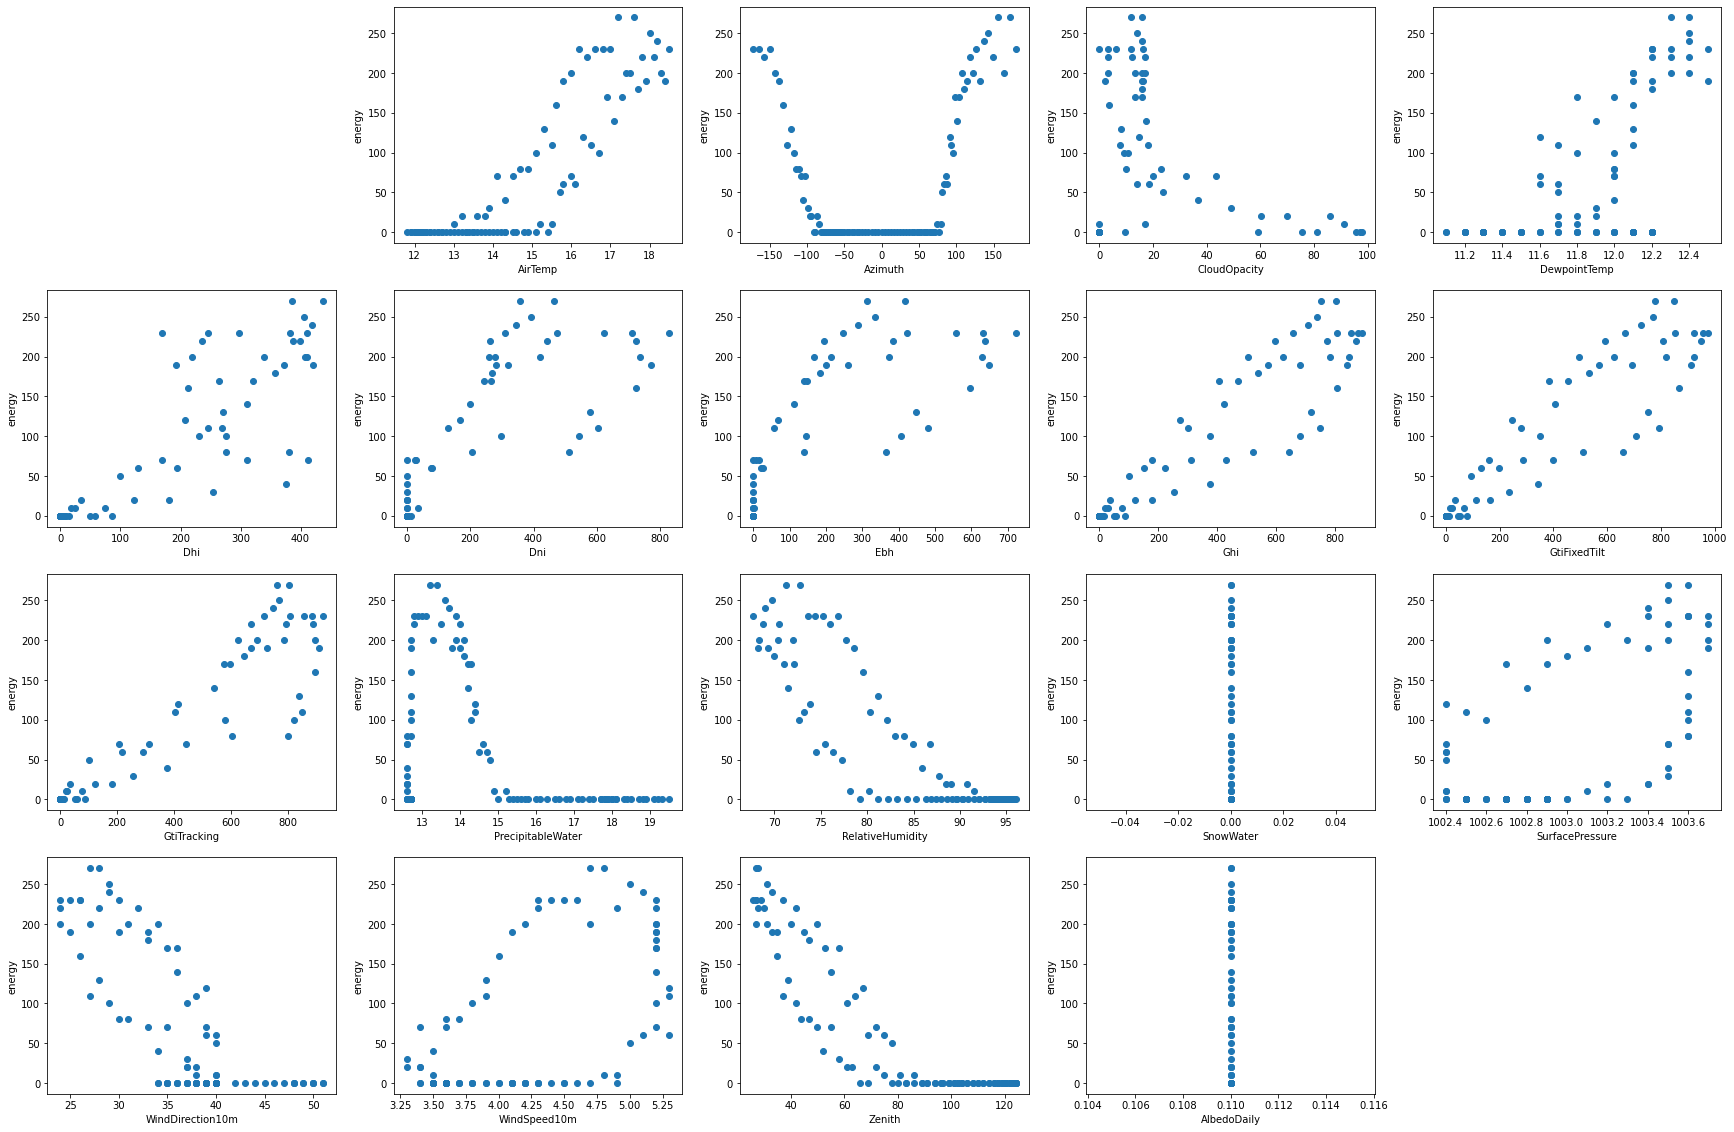

In [59]:
plt.figure(figsize=(30,20))
x,y=5,4
for i in range(1,len(mix_df.columns)-1):
    plt.subplot(y,x,i+1)
    flt_x= np.asarray(mix_df[mix_df.columns[i]]).astype(np.float32)
    flt_y= np.asarray(mix_df.energy).astype(np.float32)
    plt.scatter(flt_x[0:100],flt_y[0:100])
    plt.xlabel(mix_df.columns[i])
    plt.ylabel("energy")
plt.show()

In [34]:
X=mix_df.iloc[:,1:19].values
y=mix_df.iloc[:,-1:]

In [35]:
X = np.asarray(X).astype(np.float32)

In [36]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(X,y,test_size=0.20,random_state=8675)

In [37]:
date_index=[]
for i in range(len(test_targets)):
     date_index.append(mix_df.date[test_targets.index[i]]) 

In [38]:
train_targets = np.asarray(train_targets).astype(np.float32)
test_targets= np.asarray(test_targets).astype(np.float32)

In [39]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [40]:
model.fit(train_data, train_targets,
         epochs=30, batch_size=16, verbose=1)

Epoch 1/30
1454/1454 [==============================] - 2s 919us/step - loss: 534.9719 - mae: 12.7294
Epoch 2/30
1454/1454 [==============================] - 1s 901us/step - loss: 446.9502 - mae: 10.4818
Epoch 3/30
1454/1454 [==============================] - 1s 914us/step - loss: 437.4023 - mae: 10.1395
Epoch 4/30
1454/1454 [==============================] - 1s 919us/step - loss: 427.5712 - mae: 9.9215
Epoch 5/30
1454/1454 [==============================] - 1s 909us/step - loss: 422.1024 - mae: 9.7553
Epoch 6/30
1454/1454 [==============================] - 1s 900us/step - loss: 417.4138 - mae: 9.6441
Epoch 7/30
1454/1454 [==============================] - 1s 891us/step - loss: 414.2256 - mae: 9.5726
Epoch 8/30
1454/1454 [==============================] - 1s 908us/step - loss: 410.3966 - mae: 9.5424
Epoch 9/30
1454/1454 [==============================] - 1s 912us/step - loss: 414.2020 - mae: 9.4891
Epoch 10/30
1454/1454 [==============================] - 1s 901us/step - loss: 408.5033 

In [41]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

182/182 [==============================] - 0s 879us/step - loss: 392.6020 - mae: 9.1133


In [42]:
test_mse_score

392.6020202636719

In [43]:
test_pre=model.predict(test_data)

182/182 [==============================] - 0s 794us/step


In [44]:
from sklearn.metrics import r2_score
r2=r2_score(test_targets,test_pre)
r2

0.9096002660797294

In [45]:
X.shape

(29065, 18)

In [253]:
#GRADIENTBOOST en iyi sonucu veren train-test ayrımı bulma
import random
modeller=[]
r2Ler=[]
tut=[]
for i in range(50):
    a=random.randint(0,10000)
    from sklearn.model_selection import train_test_split
    train_data,test_data,train_targets,test_targets=train_test_split(X,y,test_size=0.20,random_state=a)
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor(n_estimators=5000) 
    gb.fit(train_data,train_targets)
    predict=gb.predict(test_data)
    from sklearn.metrics import r2_score
    r2=r2_score(test_targets,predict)
    r2Ler.append(r2)
    tut.append(a)
    from sklearn.metrics import mean_absolute_error
    mae=mean_absolute_error(test_targets,predict)
    print(r2,mae)
    print(i)

C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.938339209383753 7.931988887524442
0


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9329570298888965 8.06602864772647
1


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9352807398745003 7.9404010421722795
2


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9345492938215363 7.986569221745032
3


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9338425041099478 7.838047393021887
4


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9431242602330782 7.586014951642069
5


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9378870134195687 7.748350035905832
6


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.935420505930605 7.985018652025687
7


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9361359640698996 7.967791124408024
8


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9397063687232915 7.6123712071313765
9


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9413330033413658 7.857596453651034
10


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9399510108733071 7.779027870100874
11


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9372827631329167 7.960262282204258
12


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9344677776282633 7.819578654414269
13


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9397510256508607 7.783158011931976
14


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9303467139231778 8.131219827163575
15


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9389674749923318 7.889757302144024
16


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9392048612072197 7.5626512477725365
17


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.940124822385523 7.8204137480529035
18


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9350496359818536 7.9114717744777145
19


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.939173783878121 7.800726905881978
20


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9348400117287133 7.9603733484331505
21


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9458530544726621 7.551879768000012
22


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9376501106274421 7.877911421091698
23


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9310756199116033 8.167878853952809
24


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.936235846255495 7.966857732090963
25


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9419803852298395 7.964479836786774
26


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9421219630636823 7.74457746354738
27


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9344236212542629 8.043926418608374
28


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9324453658351974 8.393403861346938
29


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9404654031296549 7.756752368872414
30


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.937140646521128 7.801622228509612
31


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9320711548864885 8.046928019417647
32


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9360016853818295 7.6381128298291925
33


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9364761032915702 7.735294847972246
34


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.939935848225683 7.549131709384712
35


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9375913373280792 7.5228858660556766
36


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9293894852878822 8.145220400184993
37


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9376259861051208 7.879633749391226
38


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9417796911578863 7.630468250298614
39


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.935704335088323 7.945375173778044
40


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9406803929958055 7.530056207014375
41


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9381431490269921 7.868951367781695
42


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9417412200036307 7.588623250818995
43


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9349294220568111 8.15987366769534
44


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9345289442194811 7.936392951568819
45


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9403529499731392 7.8030397721523945
46


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9315551965653066 7.848330486154041
47


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9380926444110423 7.882604714400703
48


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9427673527984924 7.628178539630525
49


In [254]:
print(tut[r2Ler.index(max(r2Ler))])
print(r2Ler.index(max(r2Ler)))
print(max(r2Ler))

8675
22
0.9458530544726621


In [53]:
#random_state=8675 olan Gradient Boosting
from sklearn.model_selection import train_test_split
X = np.asarray(X).astype(np.float32)
train_data,test_data,train_targets,test_targets=train_test_split(X,y,test_size=0.20,random_state=8675)
date_index=[]
for i in range(len(test_targets)):
    date_index.append(mix_df.date[test_targets.index[i]]) 
train_targets=np.asarray(train_targets).astype(np.float32)
test_targets=np.asarray(test_targets).astype(np.float32)
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=5000) 
gb.fit(train_data,train_targets)
predict=gb.predict(test_data)
from sklearn.metrics import r2_score
r2=r2_score(test_targets,predict)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_targets,predict)
print(r2,mae)

C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9458280160394263 7.549580093463716


In [54]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_targets,predict)
mse

235.26649276145005

In [185]:
len(gb.feature_importances_)

18

In [186]:
new_X=mix_df.iloc[:,1:19]

In [187]:
col_name=new_X.columns

In [189]:
silinecekler=[]
for i in range (len(gb.feature_importances_)):
    if gb.feature_importances_[i]>0.002:
        print(col_name[i])
    else :
        silinecekler.append(col_name[i])

AirTemp
Azimuth
DewpointTemp
Dhi
Ghi
GtiFixedTilt
GtiTracking
PrecipitableWater
RelativeHumidity
SurfacePressure
WindDirection10m
WindSpeed10m
Zenith


In [190]:
new_X=new_X.drop(silinecekler,axis=1)

In [191]:
new_X

,AirTemp,Azimuth,DewpointTemp,Dhi,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
0,11.8,-56,11.2,0,0,0,0,12.6,96.0,1002.7,35,3.5,104
1,11.9,-59,11.2,0,0,0,0,12.6,95.8,1002.7,36,3.5,101
2,11.9,-62,11.3,0,0,0,0,12.7,95.7,1002.7,37,3.5,99
3,12.0,-64,11.3,0,0,0,0,12.7,95.6,1002.7,38,3.5,96
4,12.0,-67,11.3,0,0,0,0,12.7,95.5,1002.7,39,3.6,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,20.0,46,17.5,0,0,0,0,23.9,85.2,1002.9,48,4.5,103
29061,19.9,43,17.5,0,0,0,0,23.9,85.8,1002.9,48,4.4,105
29062,19.8,40,17.5,0,0,0,0,23.8,86.4,1002.8,48,4.3,106
29063,19.7,36,17.5,0,0,0,0,23.8,87.0,1002.8,48,4.2,108


In [192]:
#GRADIENTBOOST FEATURE SELECTION
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(new_X,y,test_size=0.20,random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=500) 
gb.fit(train_data,train_targets)
predict=gb.predict(test_data)

from sklearn.metrics import r2_score
r2=r2_score(test_targets,predict)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_targets,predict)
print(r2,mae)

C:\Users\zetze\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9252186071017612 8.418390179282603


In [46]:
#LİNEAR
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(X,y,test_size=0.20,random_state=8675)
from sklearn import linear_model
ln=linear_model.Lasso(alpha=0.1)
ln.fit(train_data,train_targets)
predict=ln.predict(test_data)

from sklearn.metrics import r2_score
r2=r2_score(test_targets,predict)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_targets,predict)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_targets,predict)
print(r2,mae,mse)

0.9024290972561906 12.071734542492312 423.74606122626875


C:\Users\zetze\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.975e+06, tolerance: 1.020e+04
  model = cd_fast.enet_coordinate_descent(


In [165]:
#Buradan sonrası r2=94.5 çıkan Gradient Boosting modeli için yapılmıştır
date_df =pd.DataFrame(date_index,columns = ['date'])
test_df=pd.DataFrame(test_targets,columns = ['real'])
pre_df=pd.DataFrame(predict,columns=['predict'])

In [166]:
lk_df=pd.concat([date_df,test_df,pre_df],axis=1)

In [167]:
len(predict)

5813

In [168]:
lk_df[150:200]

,date,real,predict
150,2018-08-25 17:15:00,93.000000,91.151498
151,2018-06-16 18:00:00,54.000000,64.187390
152,2019-02-16 19:45:00,0.000000,0.848773
153,2018-05-02 14:30:00,200.000000,217.021897
154,2018-11-24 03:15:00,0.000000,-0.809621
155,2018-05-26 03:15:00,0.000000,0.395389
156,2018-12-02 18:15:00,0.000000,-1.349641
157,2019-04-13 20:15:00,0.000000,2.881186
158,2018-05-10 05:00:00,0.000000,-0.096287
159,2019-02-23 06:00:00,1.000000,-0.322499


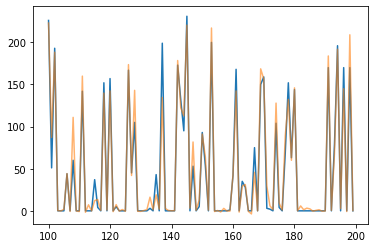

In [169]:
import matplotlib.pyplot as plt
plt.plot(test_df[100:200])
plt.plot(pre_df[100:200],alpha=0.6)

In [204]:
#Buradan sonraki işlemler, enerji verileri olmayan günler için bir tahmin yapmaktadır.
last_500=mix_df.iloc[-500:,:]["energy"]
last_500

28565    87
28566    68
28567    54
28568    52
28569    36
         ..
29060     0
29061     0
29062     0
29063     0
29064     0
Name: energy, Length: 500, dtype: object

In [205]:
last_500=list(last_500)

In [206]:
len(last_500)

500

In [207]:
last_500_date=list(mix_df.iloc[-500:,:]["date"])

In [208]:
last_500_date

[Timestamp('2019-05-26 18:00:00'),
 Timestamp('2019-05-26 18:15:00'),
 Timestamp('2019-05-26 18:30:00'),
 Timestamp('2019-05-26 18:45:00'),
 Timestamp('2019-05-26 19:00:00'),
 Timestamp('2019-05-26 19:15:00'),
 Timestamp('2019-05-26 19:30:00'),
 Timestamp('2019-05-26 19:45:00'),
 Timestamp('2019-05-26 20:00:00'),
 Timestamp('2019-05-26 20:15:00'),
 Timestamp('2019-05-26 20:30:00'),
 Timestamp('2019-05-26 20:45:00'),
 Timestamp('2019-05-26 21:00:00'),
 Timestamp('2019-05-26 21:15:00'),
 Timestamp('2019-05-26 21:30:00'),
 Timestamp('2019-05-26 21:45:00'),
 Timestamp('2019-05-26 22:00:00'),
 Timestamp('2019-05-26 22:15:00'),
 Timestamp('2019-05-26 22:30:00'),
 Timestamp('2019-05-26 22:45:00'),
 Timestamp('2019-05-26 23:00:00'),
 Timestamp('2019-05-26 23:15:00'),
 Timestamp('2019-05-26 23:30:00'),
 Timestamp('2019-05-26 23:45:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-05-27 00:15:00'),
 Timestamp('2019-05-27 00:30:00'),
 Timestamp('2019-05-27 00:45:00'),
 Timestamp('2019-05-

In [209]:
len(last_500_date)

500

In [210]:
future_100=veriler[40974:41074]
future_100

,date,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
40974,2019-05-31 23:00:00,19.5,30,0.0,17.5,0,0,0,0,0,0,23.7,88.3,0.0,1002.8,48,4.0,111,0.11
40975,2019-05-31 23:15:00,19.4,26,0.0,17.5,0,0,0,0,0,0,23.7,88.9,0.0,1002.8,48,3.9,113,0.11
40976,2019-05-31 23:30:00,19.3,23,0.0,17.5,0,0,0,0,0,0,23.7,89.5,0.0,1002.8,48,3.8,114,0.11
40977,2019-05-31 23:45:00,19.2,19,0.0,17.5,0,0,0,0,0,0,23.6,90.1,0.0,1002.7,48,3.7,115,0.11
40978,2019-06-01 00:00:00,19.2,15,0.0,17.5,0,0,0,0,0,0,23.6,90.0,0.0,1003.0,46,3.6,116,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,2019-06-01 22:45:00,20.3,33,53.2,17.7,0,0,0,0,0,0,27.3,85.2,0.0,1007.8,42,3.9,110,0.11
41070,2019-06-01 23:00:00,20.2,30,53.4,17.7,0,0,0,0,0,0,27.3,85.2,0.0,1007.8,43,3.9,111,0.11
41071,2019-06-01 23:15:00,20.2,26,47.8,17.7,0,0,0,0,0,0,27.3,85.3,0.0,1007.8,44,3.9,112,0.11
41072,2019-06-01 23:30:00,20.2,23,47.8,17.6,0,0,0,0,0,0,27.3,85.3,0.0,1007.9,44,3.8,114,0.11


In [211]:
future_100_p=future_100.iloc[:,1:]

In [212]:
future_100_p

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
40974,19.5,30,0.0,17.5,0,0,0,0,0,0,23.7,88.3,0.0,1002.8,48,4.0,111,0.11
40975,19.4,26,0.0,17.5,0,0,0,0,0,0,23.7,88.9,0.0,1002.8,48,3.9,113,0.11
40976,19.3,23,0.0,17.5,0,0,0,0,0,0,23.7,89.5,0.0,1002.8,48,3.8,114,0.11
40977,19.2,19,0.0,17.5,0,0,0,0,0,0,23.6,90.1,0.0,1002.7,48,3.7,115,0.11
40978,19.2,15,0.0,17.5,0,0,0,0,0,0,23.6,90.0,0.0,1003.0,46,3.6,116,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,20.3,33,53.2,17.7,0,0,0,0,0,0,27.3,85.2,0.0,1007.8,42,3.9,110,0.11
41070,20.2,30,53.4,17.7,0,0,0,0,0,0,27.3,85.2,0.0,1007.8,43,3.9,111,0.11
41071,20.2,26,47.8,17.7,0,0,0,0,0,0,27.3,85.3,0.0,1007.8,44,3.9,112,0.11
41072,20.2,23,47.8,17.6,0,0,0,0,0,0,27.3,85.3,0.0,1007.9,44,3.8,114,0.11


In [213]:
future_100_pred=gb.predict(future_100_p)

C:\Users\zetze\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [216]:
future_100_pred[1]

-0.3419361784226965

In [217]:
future_100_pred_list=[]
for i in range(len(future_100_pred)):
    future_100_pred_list.append(future_100_pred[i])

In [218]:
future_100_pred_list

[-0.4615366707290375,
 -0.3419361784226965,
 -0.31914976653179894,
 -0.12966319258979708,
 0.1593649557718735,
 -0.516860534280644,
 -0.03334728809447448,
 -0.981302753726138,
 2.1454088778038605,
 3.7810605298054853,
 3.8844260520535605,
 3.150846039421365,
 3.1435493641680887,
 -11.015233802147378,
 2.635387068499587,
 3.067118919020097,
 4.9700032877411875,
 4.831836462012727,
 4.704697612835919,
 5.408310533945774,
 5.398575364191156,
 5.398575364191156,
 5.187627748452452,
 5.091829634228215,
 5.286636989987211,
 5.294080184263771,
 5.109661542450078,
 5.143666051781044,
 4.226076665574362,
 10.111643360367989,
 11.56686693653998,
 15.361999058095561,
 17.844051932586588,
 18.920023000499512,
 28.885099718063888,
 26.872496578218474,
 44.907577117541265,
 39.67996644895174,
 71.15028064629975,
 68.32989790689264,
 99.31660212791857,
 108.29483841761973,
 109.7150354891053,
 119.01441380633156,
 117.73818981267033,
 154.52692857817914,
 151.29971485070152,
 125.60594408973581,
 143

In [219]:
future_100_date=list(future_100.iloc[-100:,:]["date"])
len(future_100_date)

100

In [220]:
pd1=pd.DataFrame(future_100_date,columns=["date"])
pd2=pd.DataFrame(future_100_pred_list,columns=["future_predict"])
df_future=pd.concat([pd1,pd2],axis=1)
df_future

,date,future_predict
0,2019-05-31 23:00:00,-0.461537
1,2019-05-31 23:15:00,-0.341936
2,2019-05-31 23:30:00,-0.319150
3,2019-05-31 23:45:00,-0.129663
4,2019-06-01 00:00:00,0.159365
...,...,...
95,2019-06-01 22:45:00,4.603500
96,2019-06-01 23:00:00,4.112416
97,2019-06-01 23:15:00,3.758876
98,2019-06-01 23:30:00,3.612475


In [221]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(df_future)

                  date  future_predict
0  2019-05-31 23:00:00       -0.461537
1  2019-05-31 23:15:00       -0.341936
2  2019-05-31 23:30:00       -0.319150
3  2019-05-31 23:45:00       -0.129663
4  2019-06-01 00:00:00        0.159365
5  2019-06-01 00:15:00       -0.516861
6  2019-06-01 00:30:00       -0.033347
7  2019-06-01 00:45:00       -0.981303
8  2019-06-01 01:00:00        2.145409
9  2019-06-01 01:15:00        3.781061
10 2019-06-01 01:30:00        3.884426
11 2019-06-01 01:45:00        3.150846
12 2019-06-01 02:00:00        3.143549
13 2019-06-01 02:15:00      -11.015234
14 2019-06-01 02:30:00        2.635387
15 2019-06-01 02:45:00        3.067119
16 2019-06-01 03:00:00        4.970003
17 2019-06-01 03:15:00        4.831836
18 2019-06-01 03:30:00        4.704698
19 2019-06-01 03:45:00        5.408311
20 2019-06-01 04:00:00        5.398575
21 2019-06-01 04:15:00        5.398575
22 2019-06-01 04:30:00        5.187628
23 2019-06-01 04:45:00        5.091830
24 2019-06-01 05:00:00   

In [222]:
hourly_date_last=[]
hourly_energy_last=[]
for i in range(len(last_500_date)):
    if last_500_date[i].minute==0:
        hourly_date_last.append(last_500_date[i])
        hourly_energy_last.append(last_500[i])

In [223]:
hourly_date_future=[]
hourly_energy_future=[]
for i in range(len(future_100_date)):
    if future_100_date[i].minute==0:
        hourly_date_future.append(future_100_date[i])
        hourly_energy_future.append(future_100_pred_list[i])

In [224]:
hourly_energy_last = np.asarray(hourly_energy_last).astype(np.float32)

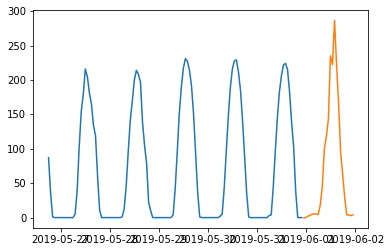

In [225]:
plt.plot(hourly_date_last,hourly_energy_last)
plt.plot(hourly_date_future,hourly_energy_future)